# Credit Application - Case Study

## Analysis of Application_Data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools # using itertools for efficient looping plotting subplots


In [2]:
# to suppress warnings
import warnings   
warnings.filterwarnings("ignore")

In [3]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', False)

#### 1. reading and understanding the data

##### 1.1 Importing the dataset


In [4]:
# importing application_data.csv

app_data = pd.read_csv("application_data.csv")

In [5]:
#checking the rows and columns of the raw dataset

app_data.shape



(307511, 122)

This dataset for application data has:

**307511 rows** </br>
**122 columns**

In [6]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#Checking information of all the columns like data types
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

We can see that there are: </font></br>

65 columns with dtype=float64 </font></br>
41 columns with dtype=int64 </font></br>
16 columns with dtype=object

In [9]:
# Get the count,size and unique values in each column of application data
app_data.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,62,2,2,

In [10]:
# Checking the numeric variables of the dataframes
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

**Observation:**

there columns having  postive, negative values which includes days. some data manipulation and fixing is required </br>
there are columns with very high values, columns related to Amount. standardising is required </br>

#### 2. Data Cleaning & Manipulation
##### 2.1 Checking Distribution of Target Variable

In [11]:
defaulters=app_data[app_data.TARGET==1]
nondefaulters=app_data[app_data.TARGET==0]

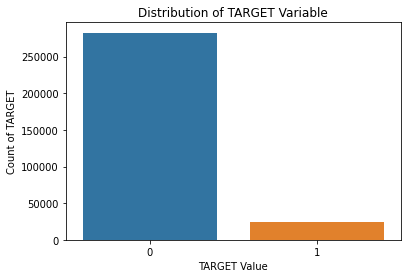

In [12]:
sns.countplot(app_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

**Observation:** </br>
I can see this is a huge imbalanced dataset. There are far more loans that were repaid on time than loans that were not repaid.
More than 25000 loans were repaid, Less than 5000 loans were not repaid. So we can calculate the percentage of it.

In [13]:
percentage_defaulters=(len(defaulters)*100)/len(app_data)
percentage_nondefaulters=(len(nondefaulters)*100)/len(app_data)

print("The Percentage of people who have paid their loan:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance:",round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan: 91.93 %
The Percentage of people who have NOT paid their loan: 8.07 %
The Ratio of Data Imbalance: 11.39


##### 2.1 Null Values

In [14]:
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# Identifying missing values in each column
#Function to calculate null_values to identify % of data is missing in each column
def null_values(df):
    total = df.isnull().sum()
    datatypes = df.dtypes
    unique = df.nunique()
    percent = round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
    # percent = (df.isnull().sum()/df.isnull().count()*100)
    return pd.concat([total, datatypes, unique, percent], axis=1, keys=['Total', 'Data_Type', 'Unique', 'Percent']).sort_values(by="Percent", ascending=False)

In [16]:
#calculating null_values_data for application_data
null_values_data=null_values(app_data)
null_values_data

,Total,Data_Type,Unique,Percent
COMMONAREA_MEDI,214865,float64,3202,69.87
COMMONAREA_AVG,214865,float64,3181,69.87
COMMONAREA_MODE,214865,float64,3128,69.87
NONLIVINGAPARTMENTS_MODE,213514,float64,167,69.43
NONLIVINGAPARTMENTS_AVG,213514,float64,386,69.43
NONLIVINGAPARTMENTS_MEDI,213514,float64,214,69.43
FONDKAPREMONT_MODE,210295,object,4,68.39
LIVINGAPARTMENTS_MODE,210199,float64,736,68.35
LIVINGAPARTMENTS_AVG,210199,float64,1868,68.35
LIVINGAPARTMENTS_MEDI,210199,float64,1097,68.35


**Observation:**

Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. But practically we get variables with more than ~50% of missing values but still, the customer insists to have it for analyzing. In those cases, we have to treat them accordingly.

In [17]:
unwanted_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# we will drop after in further analysis.

##### 2.1.1 Dealing with Null values more than 50%

In [18]:
# Dropping columns with High Missing Values more than 50% missing values

cols_to_keep=list(null_values_data[(null_values_data.Percent<50)].index)
cols_to_keep


['FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FL

In [19]:
application_data=app_data[cols_to_keep]
application_data.describe()

,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,CNT_CHILDREN,FLAG_DOCUMENT_8,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,SK_ID_CURR
count,154491.000000,154491.000000,154491.000000,157504.000000,157504.000000,157504.000000,159080.000000,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307511.000000
mean,0.222315,0.225897,0.226282,0.977065,0.977752,0.977735,0.102547,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.143421,1.422245,1.405292,0.100049,5.143927e-01,5.383962e+05,0.417052,0.081376,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.003896,0.000335,0.000023,0.003912,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000007,5.990260e+05,1.687979e+05,0.281066,0.179555,0.230454,0.080729,0.078173,0.040659,0.050769,0.015144,12.063419,2.031521,2.052463,2.152665,0.056720,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,27108.573909,278180.518577
std,0.143709,0.145067,0.144641,0.064575,0.059897,0.059223,0.107462,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.446698,2.400989,2.379803,0.362291,1.910602e-01,3.694465e+05,0.722121,0.273412,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.062295,0.018299,0.004771,0.062424,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.002550,4.024908e+05,2.371231e+05,0.449521,0.383817,0.421124,0.272419,0.268444,0.197499,0.219526,0.122126,3.265832,0.502737,0.509034,0.910682,0.231307,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,14493.737315,102790.175348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.

In [20]:
application_data.shape  # Now there are 81 columns remaining

(307511, 81)

In [21]:
#revieving null columns which have been removed more than 50% of null values.
cols_to_remove=list(null_values_data[(null_values_data.Percent>50)].index)
print("Num of columns having missing values more than 50% :",len(cols_to_remove))

Num of columns having missing values more than 50% : 41


In [22]:
# #dropping above columns as decided

# application_data.drop(cols_to_remove, axis=1, inplace= True)

**Observation:**

There are 41 columns having null values more than 50% which are related to different area sizes on apartment owned/rented by the loan applicant

##### 2.1.2 Dealing with Null values columns with very less missing values

In [23]:
null_col_less_15=pd.DataFrame(null_values_data[(null_values_data.Percent>0)&(null_values_data.Percent<15)])

null_col_less_15

,Total,Data_Type,Unique,Percent
AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64,5,13.50
AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,float64,24,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,11,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64,25,13.50
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33


In [24]:
len(null_col_less_15)

13

Explanation for treatment of columns with low missing values</br>
AMT_REQ_CREDIT_BUREAU_HOUR</br>
AMT_REQ_CREDIT_BUREAU_DAY</br>
AMT_REQ_CREDIT_BUREAU_WEEK</br>
AMT_REQ_CREDIT_BUREAU_MON</br>
AMT_REQ_CREDIT_BUREAU_QRT</br>
AMT_REQ_CREDIT_BUREAU_YEAR</br>
We can impute missing values in these columns above with 0s and assume that no enquiry was made during the time reflected in null rows in Imputing Section.</br>

NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.</br>
OBS_30_CNT_SOCIAL_CIRCLE & related fields.</br>
EXT_SOURCE_2</br>
AMT_GOODS_PRICE</br>
CNT_FAM_MEMBERS</br>
AMT_ANNUITY</br>
DAYS_LAST_PHONE_CHANGE</br>
We should not add any additional info in missing values of these columns above as it would lead to noise and exaggeration.


##### 2.1.3 Dealing with Null values more than 15% and less than 50%

In [25]:
null_col_more_15_less_50=pd.DataFrame(null_values_data[(null_values_data.Percent>15)&(null_values_data.Percent<50)])
null_col_more_15_less_50

,Total,Data_Type,Unique,Percent
FLOORSMAX_MODE,153020,float64,25,49.76
FLOORSMAX_MEDI,153020,float64,49,49.76
FLOORSMAX_AVG,153020,float64,403,49.76
YEARS_BEGINEXPLUATATION_MODE,150007,float64,221,48.78
YEARS_BEGINEXPLUATATION_MEDI,150007,float64,245,48.78
YEARS_BEGINEXPLUATATION_AVG,150007,float64,285,48.78
TOTALAREA_MODE,148431,float64,5116,48.27
EMERGENCYSTATE_MODE,145755,object,2,47.40
OCCUPATION_TYPE,96391,object,18,31.35
EXT_SOURCE_3,60965,float64,814,19.83


***From the columns dictionary we can conclude that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks relevant to TARGET column.thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3**

In [26]:
application_data.shape

(307511, 81)

In [27]:
application_data.head()

,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR
0,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,0,0,Cash loans,M,N,-1134.0,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,1.0,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002
1,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,1.0,0.0,0.622246,1129500.0,0,0,Cash loans,F,N,-828.0,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,2.0,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,35698.5,100003
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,0,0,Revolving loans,M,Y,-815.0,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,1.0,0,1,Government,1,1,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,2.0,2.0,0.0,0.650442,297000.0,0,0,Cash loans,F,N,-617.0,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,312682.5,135000.0,0,0,0,0,0,0,0,0,17,WEDNESDAY,2,2,2.0,0,1,Business Entity Type 3,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,0,1,Cash loans,M,N,-1106.0,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,513000.0,121500.0,0,1,1,0,0,0,0,0,11,THURSDAY,2,2,1.0,0,1,Religion,0,1,1,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007


In [28]:
application_data.columns

Index(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',


In [29]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "null_col_more_15_less_50" so that we can drop all other at once.

null_col_more_15_less_50.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [30]:
print(null_col_more_15_less_50)
print()
print(f"No of columns having missing values more than 15% and less than 50% which are not reletable:{len(null_col_more_15_less_50)}")

                               Total Data_Type  Unique  Percent
FLOORSMAX_MODE                153020   float64      25    49.76
FLOORSMAX_MEDI                153020   float64      49    49.76
FLOORSMAX_AVG                 153020   float64     403    49.76
YEARS_BEGINEXPLUATATION_MODE  150007   float64     221    48.78
YEARS_BEGINEXPLUATATION_MEDI  150007   float64     245    48.78
YEARS_BEGINEXPLUATATION_AVG   150007   float64     285    48.78
TOTALAREA_MODE                148431   float64    5116    48.27
EMERGENCYSTATE_MODE           145755    object       2    47.40

No of columns having missing values more than 15% and less than 50% which are not reletable:8


In [31]:
#thus removing columns having missing values more than 15% and less than 50% which are not reletable to TARGET column.

application_data.drop(null_col_more_15_less_50.index,axis=1, inplace = True)

In [32]:
application_data.shape

(307511, 73)

* **After after dropping 8 columns we are left with 73 columns**
* **There are 2 more Columns with missing values more than 15% and less than 50% which are not reletable**

### 2.2 Analyse & Removing Unneccsary Columns

#### 2.2.1 analysing data type of int

In [33]:
null_values(application_data).sort_values(by="Percent", ascending=False)

,Total,Data_Type,Unique,Percent
OCCUPATION_TYPE,96391,object,18,31.35
EXT_SOURCE_3,60965,float64,814,19.83
AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64,5,13.50
AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,float64,24,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,11,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64,25,13.50
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33


In [34]:
# looking at all the columns names for different data types
null_values(application_data).sort_values(by="Data_Type")

,Total,Data_Type,Unique,Percent
SK_ID_CURR,0,int64,307511,0.00
REGION_RATING_CLIENT_W_CITY,0,int64,3,0.00
REGION_RATING_CLIENT,0,int64,3,0.00
FLAG_DOCUMENT_3,0,int64,2,0.00
FLAG_EMAIL,0,int64,2,0.00
FLAG_CONT_MOBILE,0,int64,2,0.00
DAYS_BIRTH,0,int64,17460,0.00
FLAG_WORK_PHONE,0,int64,2,0.00
FLAG_EMP_PHONE,0,int64,2,0.00
FLAG_MOBIL,0,int64,2,0.00


**A lot of the int columns look like Flags, let check their unique values**

In [35]:
application_data.select_dtypes('int64').apply(pd.Series.unique, axis = 0)

CNT_CHILDREN                   [0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,...
FLAG_DOCUMENT_8                                                           [0, 1]
FLAG_DOCUMENT_2                                                           [0, 1]
FLAG_DOCUMENT_3                                                           [1, 0]
FLAG_DOCUMENT_4                                                           [0, 1]
FLAG_DOCUMENT_5                                                           [0, 1]
FLAG_DOCUMENT_6                                                           [0, 1]
FLAG_DOCUMENT_7                                                           [0, 1]
FLAG_DOCUMENT_9                                                           [0, 1]
FLAG_DOCUMENT_21                                                          [0, 1]
FLAG_DOCUMENT_10                                                          [0, 1]
FLAG_DOCUMENT_11                                                          [0, 1]
FLAG_DOCUMENT_13            

In [36]:
application_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

**Observation**
A lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.

#### 2.2.2 Now we will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones

In [37]:
application_data.shape

(307511, 73)

In [38]:
# adding all flags coloumns in variable "flag_columns"

flag_columns = [col for col in application_data.columns if "FLAG" in col]

flag_columns  # Viewing all FLAG columns

['FLAG_DOCUMENT_8',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL']

In [39]:
# creating flag_df dataframe having all FLAG columns and TARGET column

flag_df = application_data[flag_columns+["TARGET"]]
flag_df

,FLAG_DOCUMENT_8,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,TARGET
0,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1
1,0,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
2,0,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
3,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,N,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
307507,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
307508,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0
307509,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [40]:
# replacing "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})
flag_df.head()

,FLAG_DOCUMENT_8,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,TARGET
0,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,Defaulter
1,0,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,Repayer
2,0,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,Repayer
3,0,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,Repayer
4,1,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,Repayer


In [41]:
null_values_data.shape

(122, 4)

In [42]:
application_data.shape

(307511, 73)

In [43]:
#columns to convert
cols_to_convert=list(null_values_data[(null_values_data.Unique==2)&(null_values_data.Data_Type=="int64")].index)



In [44]:
#function to conver columns
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data



In [45]:
#calling the function for application_data
convert_data(application_data, cols_to_convert)
application_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
application_data.dtypes.value_counts()

object     44
float64    20
int64       9
dtype: int64

In [46]:
application_data.head()

,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR
0,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,0,N,Cash loans,M,N,-1134.0,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,406597.5,202500.0,Y,N,N,1,N,N,N,N,10,WEDNESDAY,2,2,1.0,N,Y,Business Entity Type 3,N,Y,Y,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002
1,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,1.0,0.0,0.622246,1129500.0,0,N,Cash loans,F,N,-828.0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1293502.5,270000.0,Y,N,N,0,N,N,N,N,11,MONDAY,1,1,2.0,N,Y,School,N,Y,Y,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,35698.5,100003
2,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,0,N,Revolving loans,M,Y,-815.0,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,135000.0,67500.0,Y,N,N,0,N,N,N,N,9,MONDAY,2,2,1.0,N,Y,Government,Y,Y,Y,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004
3,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,2.0,2.0,0.0,0.650442,297000.0,0,N,Cash loans,F,N,-617.0,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,312682.5,135000.0,N,N,N,0,N,N,N,N,17,WEDNESDAY,2,2,2.0,N,Y,Business Entity Type 3,N,Y,Y,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006
4,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,0,Y,Cash loans,M,N,-1106.0,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,513000.0,121500.0,N,Y,Y,0,N,N,N,N,11,THURSDAY,2,2,1.0,N,Y,Religion,N,Y,Y,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007


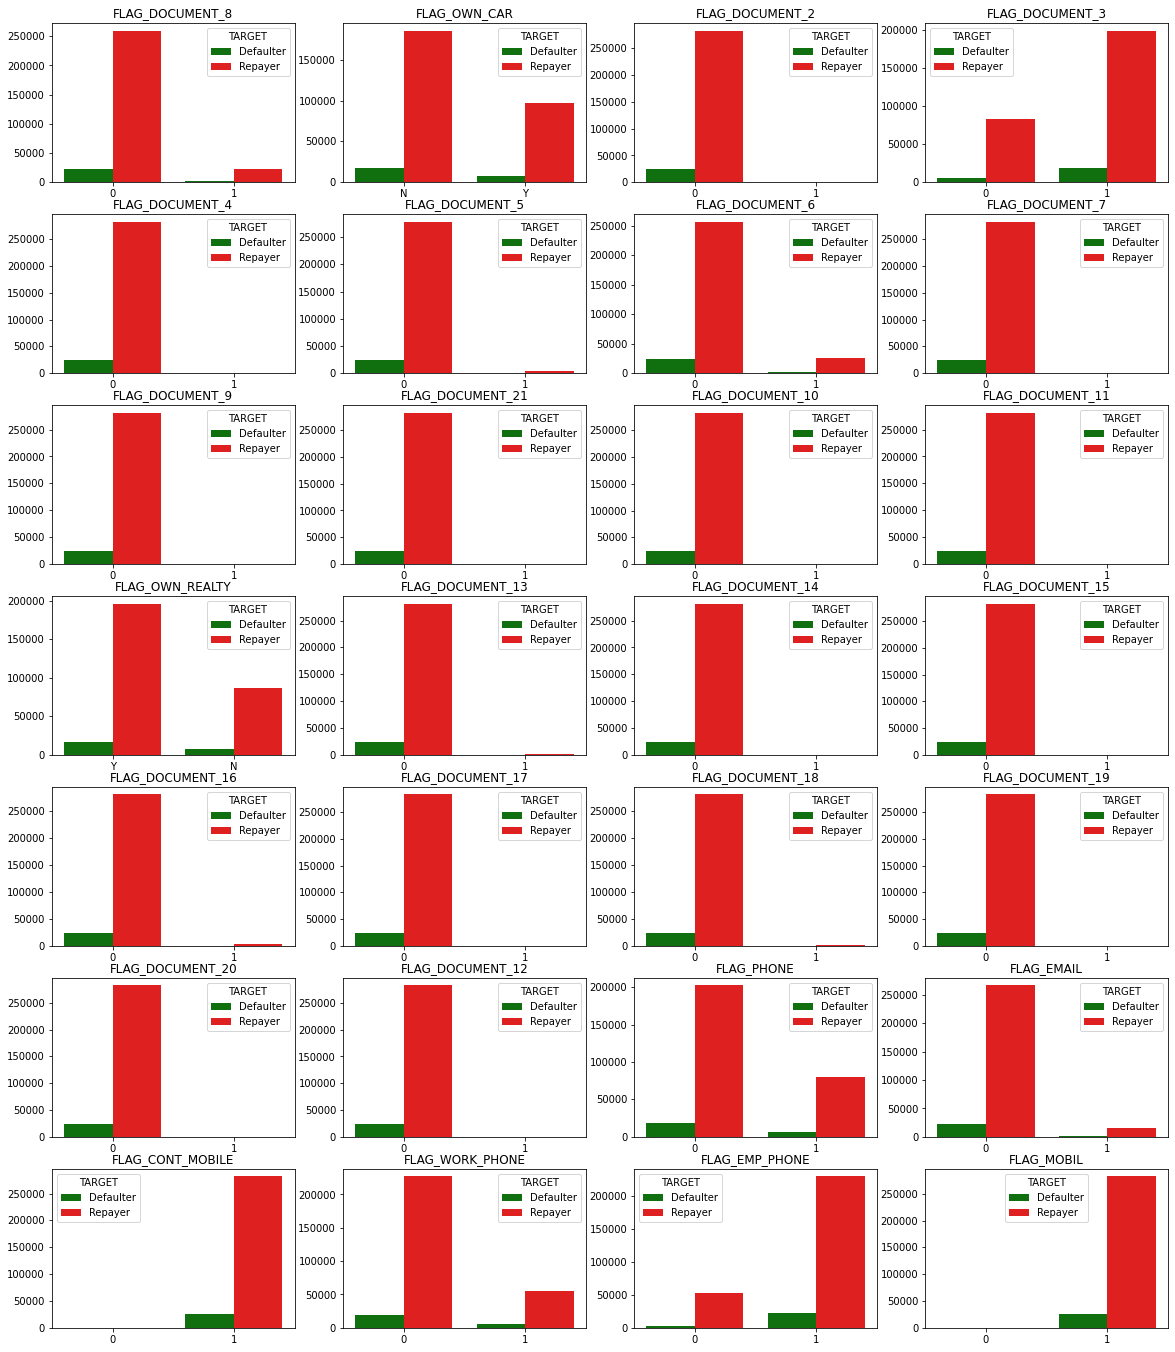

In [47]:
# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["g","r"])
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Observation**

Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and from these keeping FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL more sense thus we can include these columns and remove all other FLAG columns for furhter analysis.


In [48]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "application_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [49]:
len(flag_df.columns)

25

In [50]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "application_data" dataframe

application_data.drop(flag_df.columns, axis=1, inplace= True)

In [51]:
application_data.shape    # Now we are left 48 revelent columns

(307511, 48)

**Observation**

* **After removing uneccsarry, irrelevent and missing columns. We are left with 48 columns**

#### 2.2.1 Starting with EXT_SOURCE_3 , EXT_SOURCE_2. As they have normalised values, now we will understand the relation between these columns with TARGET column using a heatmap

In [52]:
irrevlent = ["EXT_SOURCE_3","EXT_SOURCE_2"]  # putting irrevlent columns in varibale "irrevlent"

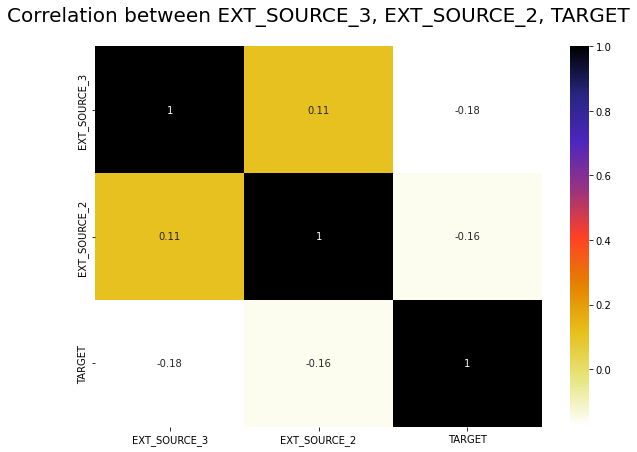

In [53]:
plt.figure(figsize= [10,7])

sns.heatmap(application_data[irrevlent+["TARGET"]].corr(), cmap="CMRmap_r",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

**Observation:**
* **There seems to be no linear correlation and also from columns description we decided to remove these columns.**
* **Also we are aware correation doesn't cause causation.**

In [54]:
#dropping above columns as decided

application_data.drop(irrevlent, axis=1, inplace= True)

In [55]:
application_data.shape  # Now we are left with 46 columns

(307511, 46)

### 3. Imputing values
Now that we have removed all the unneccesarry columns, we will proced with imputing values for relevent missing columns whereever required

In [56]:
null_data_greater_0 = null_values(application_data)[null_values(application_data)["Percent"]>0]
null_data_greater_0

,Total,Data_Type,Unique,Percent
OCCUPATION_TYPE,96391,object,18,31.35
AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,float64,24,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,11,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64,25,13.50
AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64,5,13.50
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33


In [57]:
len(null_data_greater_0)

13

In [58]:
null_values(application_data)[null_values(application_data)["Percent"]==0]

,Total,Data_Type,Unique,Percent
DAYS_EMPLOYED,0,int64,12574,0.0
REGION_RATING_CLIENT,0,int64,3,0.0
CNT_FAM_MEMBERS,2,float64,17,0.0
ORGANIZATION_TYPE,0,object,58,0.0
FLAG_MOBIL,0,object,2,0.0
DAYS_ID_PUBLISH,0,int64,6168,0.0
DAYS_REGISTRATION,0,float64,15688,0.0
NAME_INCOME_TYPE,0,object,8,0.0
DAYS_BIRTH,0,int64,17460,0.0
REGION_POPULATION_RELATIVE,0,float64,81,0.0


In [59]:
# length greater than 0
len(null_data_greater_0)

13

In [60]:
null_data_greater_1 = null_values(application_data)[null_values(application_data)["Percent"]>=1]
null_data_greater_1

,Total,Data_Type,Unique,Percent
OCCUPATION_TYPE,96391,object,18,31.35
AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,9,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,float64,24,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,11,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64,25,13.50
AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64,5,13.50


In [61]:
# length greater than 1
len(null_data_greater_1)

7

**Observation**

Now we have only 7 columns which have missing values more than 1%. Thus, we will only impute them for further analysis.

#### 3.1 Imputing for "OCCUPATION_TYPE" column

In [62]:
#Percentage of each category present in "OCCUPATION_TYPE"

application_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

**Observation**:

from above it looks like this columnn is categorical one and have missing values of 31.35%. to fix this we will impute another category as "Unknown" for the missing values.

In [63]:
# imputing null values with "Unknown"

application_data["OCCUPATION_TYPE"] = application_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [64]:
application_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [65]:
application_data["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

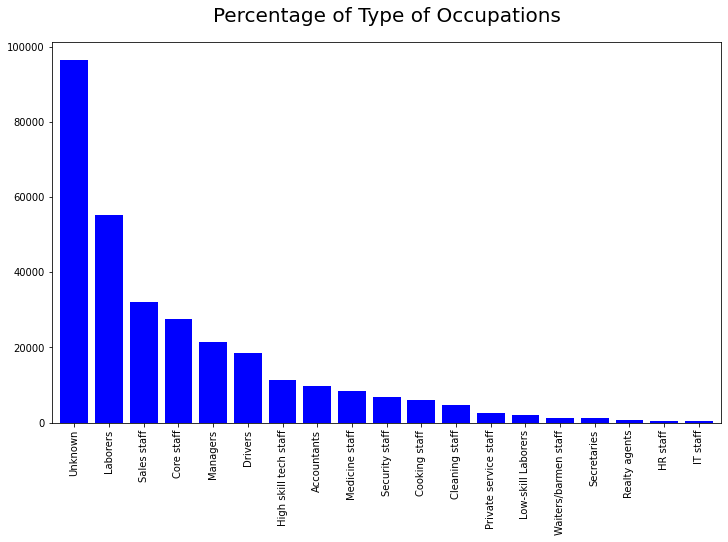

In [66]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(application_data["OCCUPATION_TYPE"].value_counts()).plot.bar(color= "blue",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

In [67]:
defaulters=application_data[application_data.TARGET==1]

nondefaulters=application_data[application_data.TARGET==0]

In [68]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,12))

    sns.set_theme(style="darkgrid")
    sns.color_palette("Spectral", as_cmap=True)
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, palette="Set2", order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, palette="Set2", order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

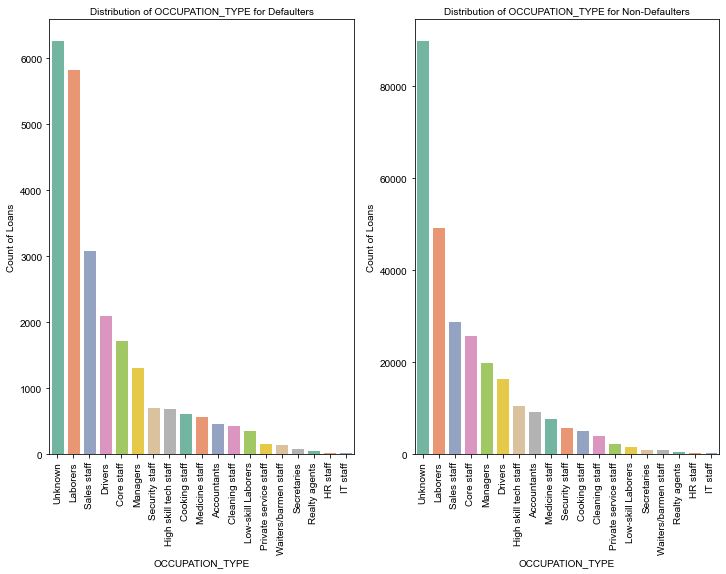

In [69]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

**Observation:**

We can see that Distribution of OCCUPATION_TYPE for Defaulters and for Non-Defaulters.

### 3.2 Imputing with 0 for AMT_REQ_CREDIT_BUREAU type data

Explanation for treatment of columns with low missing values</br>
AMT_REQ_CREDIT_BUREAU_HOUR</br>
AMT_REQ_CREDIT_BUREAU_DAY</br>
AMT_REQ_CREDIT_BUREAU_WEEK</br>
AMT_REQ_CREDIT_BUREAU_MON</br>
AMT_REQ_CREDIT_BUREAU_QRT</br>
AMT_REQ_CREDIT_BUREAU_YEAR</br>
We can impute missing values in these columns above with median and assume that some median enquiry was made during the time reflected in null rows in Imputing Section.</br>



In [70]:
application_data.shape

(307511, 46)

In [71]:
amount_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

# By describing (), you will get all the statistical information for the numeric columns and get an idea about their distribution and outliers.
application_data[amount_credit].describe()


,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


**Observation:**

These above columns represent number of enquries made for the customer(which should be discrete and not continous). from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns and assume that median enquiry was made during the time reflected in null rows in Imputing Section.

In [72]:
#filling missing values with 0 values

# application_data[amount_credit].fillna(0,inplace = True)
application_data.fillna(application_data[amount_credit].median(),inplace = True)

In [73]:
null_values(application_data)[null_values(application_data)["Percent"]>0]

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
AMT_GOODS_PRICE,278,float64,1002,0.09


In [74]:
application_data.shape

(307511, 46)

In [75]:
len(null_values(application_data)[null_values(application_data)["Percent"]>0])

6

**Observation:**

* **Still there some missing value coloumns but we will look this after analysing more**
* **So Missing values left with less than 1% and more than 50%**

### 3.3 Imputing and dealing with days contains negative values

In [76]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


**Observation:**

If we see the data carefully, we will find that though these are days, it contains negative values which is not valid. So let’s make changes accordingly.

As we can see all the columns starts with DAYS, let’s make a list of columns we want to change for ease of change.

In [77]:
day_cols = [i for i in application_data if i.startswith('DAYS')]
day_cols

['DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH']

In [78]:
application_data[day_cols]= abs(application_data[day_cols])
application_data[day_cols]

,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH
0,1134.0,2120,3648.0,637,9461
1,828.0,291,1186.0,1188,16765
2,815.0,2531,4260.0,225,19046
3,617.0,2437,9833.0,3039,19005
4,1106.0,3458,4311.0,3038,19932
...,...,...,...,...,...
307506,273.0,1982,8456.0,236,9327
307507,0.0,4090,4388.0,365243,20775
307508,1909.0,5150,6737.0,7921,14966
307509,322.0,931,2562.0,4786,11961


**Observation:**

Now we have modified the negative days into positive days value with help of abs()

#### 3.4 Checking and imputing with CODE_GENDER

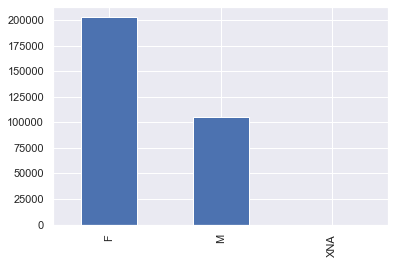

In [79]:
application_data.CODE_GENDER.value_counts().plot.bar()
plt.show()

In [80]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Observation:**

After checking for all the columns, we get to know that some columns contain ‘XNA’ values which mean null. Let’s impute it accordingly.

In [81]:
application_data.loc[application_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**Observation:**

As per above information we can impute rhe value "XNA" to "F" in the column "CODE_GENDER" as most frequent value is F

In [82]:
application_data.shape

(307511, 46)

In [83]:
application_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [84]:
Target0 = application_data.loc[application_data["TARGET"]==0] 
Target1 = application_data.loc[application_data["TARGET"]==1]

##### Calculating Imbalance percentage

In [85]:
round(len(Target0)/len(Target1),2)

11.39

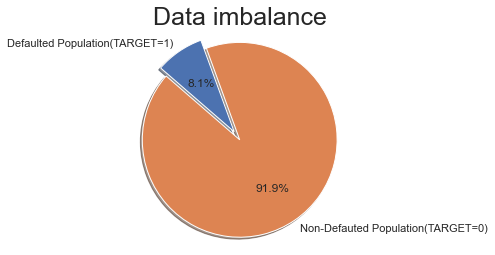

In [86]:
count1 = 0 
count0 = 0
for i in application_data['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(application_data['TARGET']))*100
count0 = (count0/len(application_data['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

**Observation**

application_data dataframe that is application data is highly imbalanced. Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.3
We will separately analyse the data based on the target variable for a better understanding.

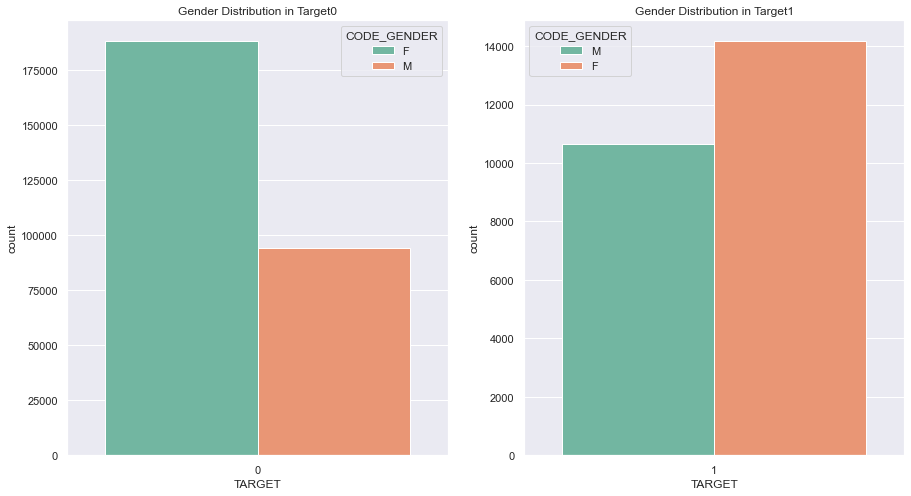

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

**Observation**

* It seems like Female clients applied higher than male clients for loan
* 66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.
* 57% Female clients are defaulters while 42% male clients are defaulters.

#### 3.5 Checking and imputing with ORGANIZATION_TYPE

In [88]:
application_data.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

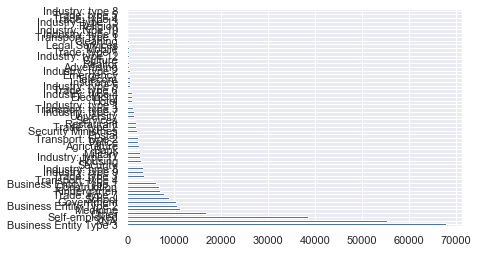

In [89]:
application_data.ORGANIZATION_TYPE.value_counts().plot.barh()

plt.show()

**Observation**

check whether these values are missing at random or are there any pattern between missing values. 

In [90]:
application_data[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']][application_data['ORGANIZATION_TYPE']=="XNA"].value_counts()

ORGANIZATION_TYPE  NAME_INCOME_TYPE
XNA                Pensioner           55352
                   Unemployed             22
dtype: int64

In [91]:
application_data[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']][application_data['ORGANIZATION_TYPE']=="XNA"].value_counts(normalize=True)*100

ORGANIZATION_TYPE  NAME_INCOME_TYPE
XNA                Pensioner           99.96027
                   Unemployed           0.03973
dtype: float64

**Observation:**

Here we observe that wherever NAME_INCOME_TYPE is Pensioner there only we have null values in ORGANIZATON_TYPE column.Let’s see count of Pensioner and then we’ll decide whether to impute null values of ORGANIZATION_TYPE with Pensioner or not.

In [92]:
application_data.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Observation:**

* So from these data, we can conclude that Pensioner value is approximately equal to null values in ORGANIZATION_TYPE column. So the value is Missing At Random
* Similarly imputing null values of OCCUPATION_TYPE with Pensioner as most of the null values for OCCUPATION_TYPE compared to Income type variable values we found that “Pensioner” is the most frequent value almost 99% of the null values of OCCUPATION_TYPE

In [93]:
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
application_data['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [94]:
null_values(application_data)

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
AMT_GOODS_PRICE,278,float64,1002,0.09
OCCUPATION_TYPE,0,object,19,0.00
DAYS_REGISTRATION,0,float64,15688,0.00
HOUR_APPR_PROCESS_START,0,int64,24,0.00
WEEKDAY_APPR_PROCESS_START,0,object,7,0.00


In [95]:
application_data.shape

(307511, 46)

### 4. Univariate Analyis on Categorical Columns

**Getting a list of columns with dtype=object, to identify columns for categorical analysis**

In [96]:
application_data.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_DOCUMENT_3', 'FLAG_OWN_REALTY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FLAG_MOBIL', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'], dtype='object')

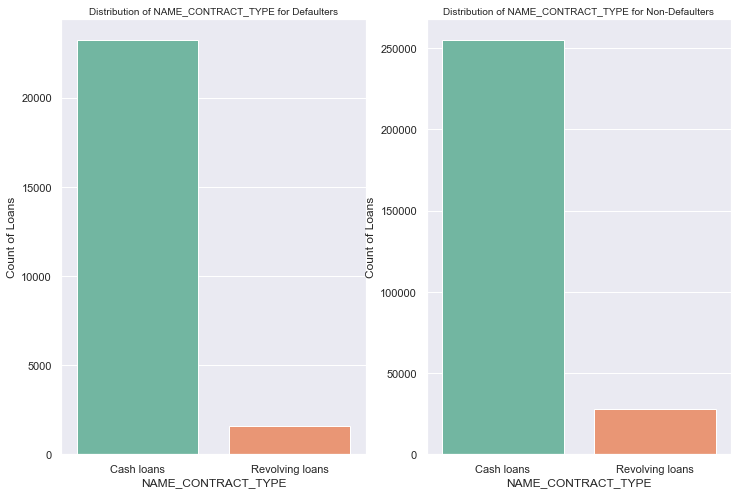

In [97]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

**Observation:**

We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

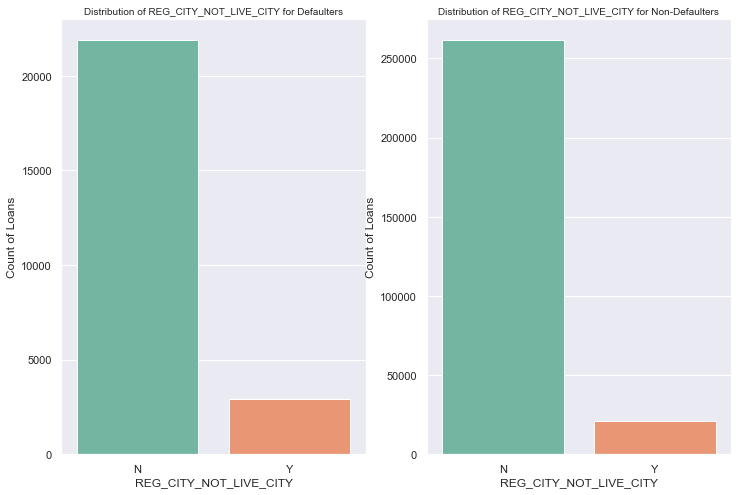

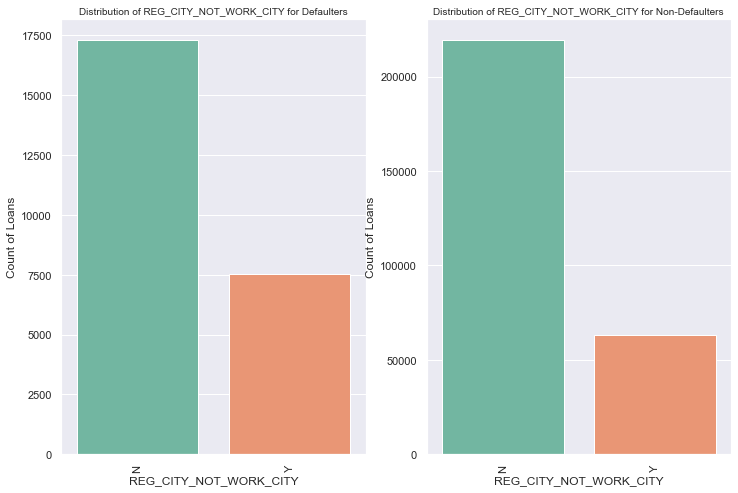

In [98]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

**Observation:**

We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties.

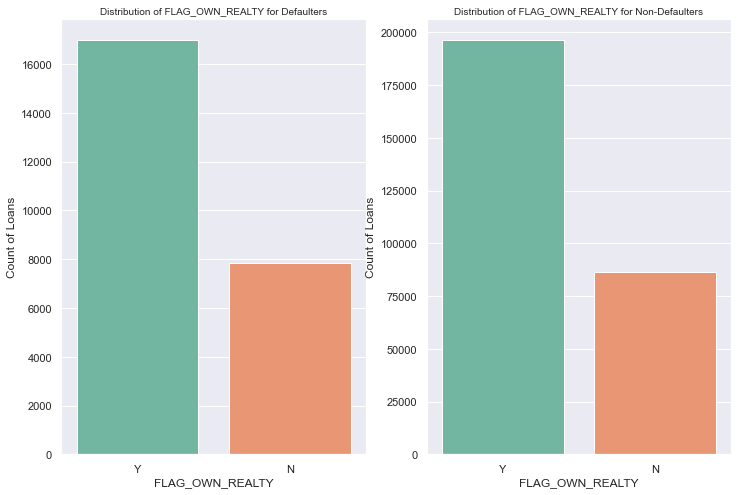

In [99]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)

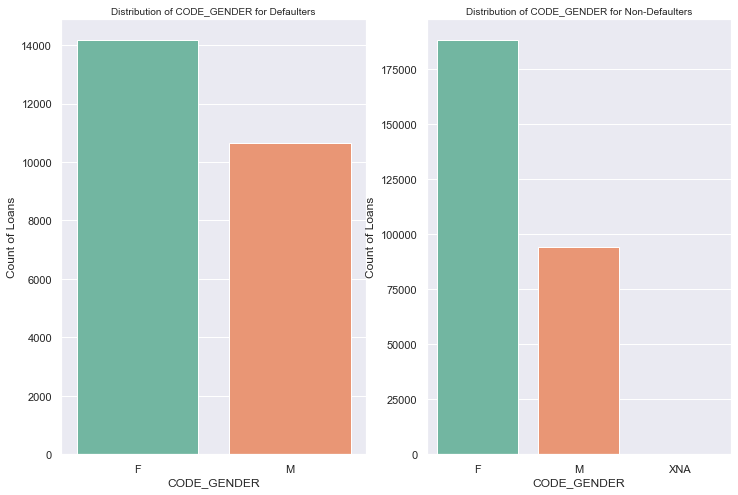

In [100]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

**Observation:**

We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1

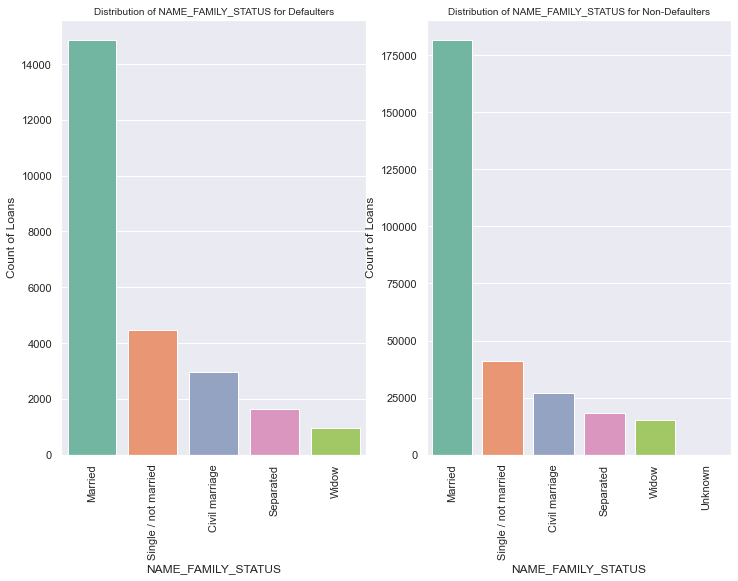

In [101]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

**Observation:**

Ratio of Single/Unmarried people is more in the left graph.

Single/Unmarried people are more likely to have payment difficulties

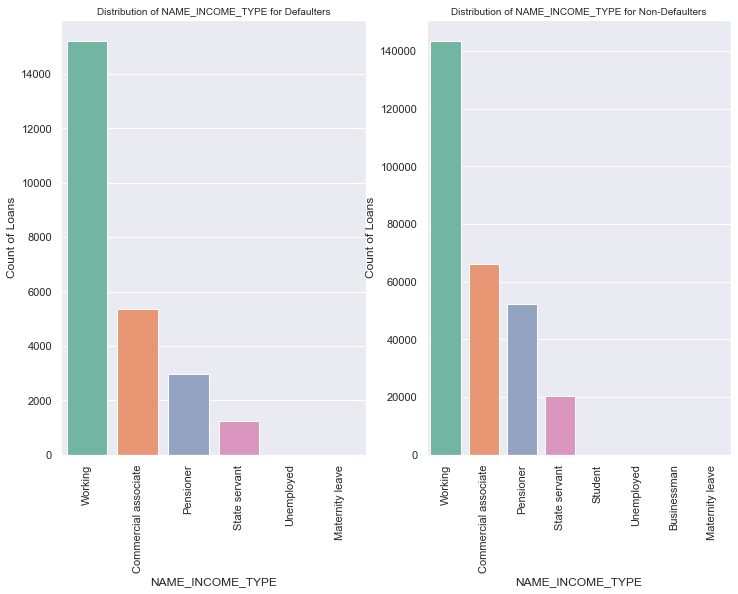

In [102]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

**Observation:**

Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.

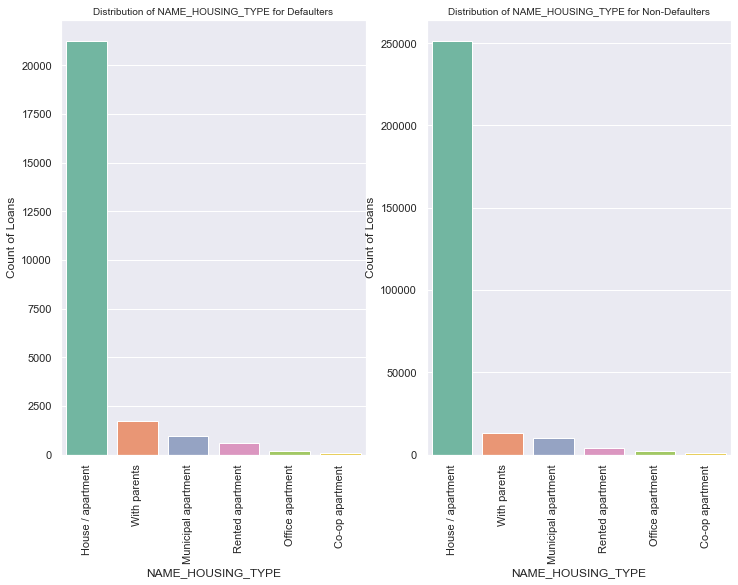

In [103]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

**Observation**:

Most people live in a House/Apartment
Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.

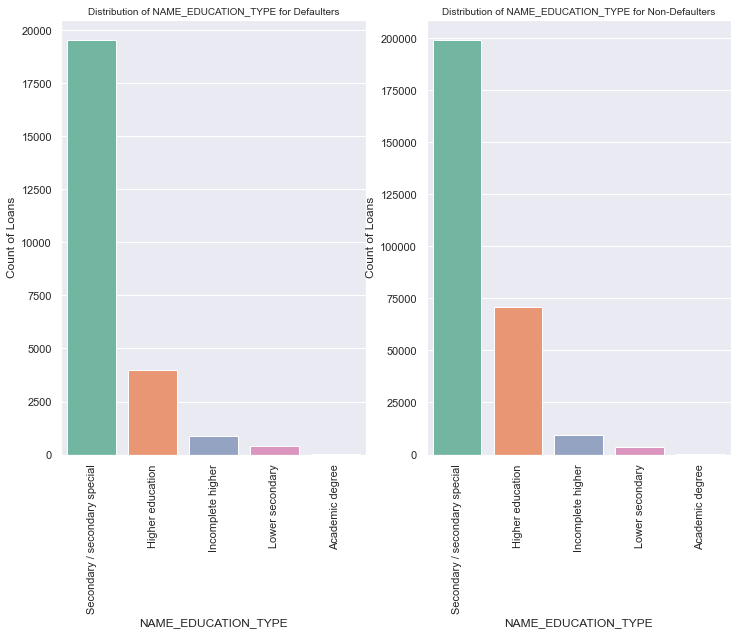

In [104]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

**Observation:**

While the category with highest count remains same.

* This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.
* People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

#### 4.1 Dealing with categorical nominal values

We have some columns which have nominal categorical values. So let’s impute them accordingly.

In [105]:
application_data.shape

(307511, 46)

In [106]:
application_data['AMT_INCOME_TYPE'] = pd.qcut(application_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
application_data['AMT_INCOME_TYPE'].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY_HIGH     14035
Name: AMT_INCOME_TYPE, dtype: int64

#### 4.2 Binning "AMT_CREDIT" to "AMT_CREDIT_TYPE" based on quantiles

In [107]:
application_data['AMT_CREDIT_TYPE'] = pd.qcut(application_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_data['AMT_CREDIT_TYPE'].value_counts()

MEDIUM       94750
LOW          88924
VERY_LOW     64925
HIGH         44878
VERY_HIGH    14034
Name: AMT_CREDIT_TYPE, dtype: int64

#### 4.3 Bin ‘DAYS_BIRTH’ column by converting it to years based on various “AGE_GROUP”

In [108]:
application_data['DAYS_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)    # Converting 
application_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [109]:
application_data['AGE_GROUP']=pd.cut(application_data['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

In [110]:
application_data[['DAYS_BIRTH','AGE_GROUP']].tail()

,DAYS_BIRTH,AGE_GROUP
307506,25,Very_Young
307507,56,Middle_Age
307508,41,Middle_Age
307509,32,Young
307510,46,Middle_Age


##### 4.3.1 Age Distribution based on Target 0 and Target 1

In [111]:
Target0 = application_data.loc[application_data["TARGET"]==0] 
Target1 = application_data.loc[application_data["TARGET"]==1]
round(len(Target0)/len(Target1),2)

11.39

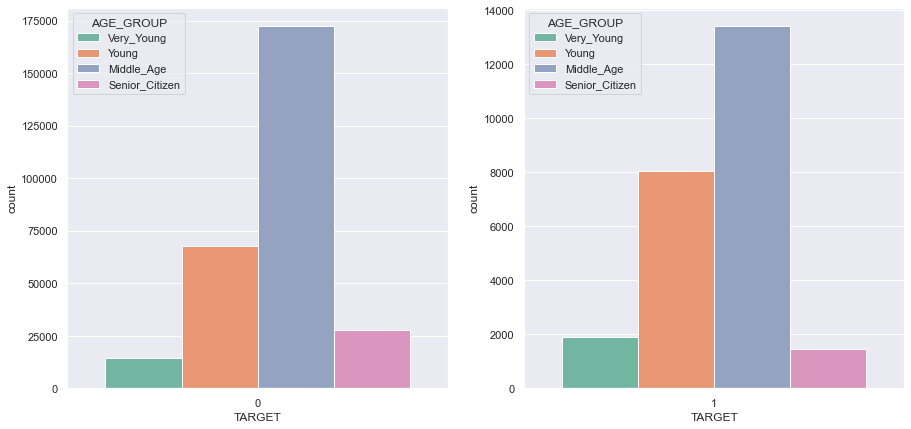

In [112]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

**Observation:**

* Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
* Also, Middle Age group facing paying difficulties the most.
* While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.

In [113]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

application_data["YEARS_EMPLOYED"] = application_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

application_data["EMPLOYEMENT_YEARS"] = pd.cut(application_data["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [114]:
application_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

In [115]:
application_data.shape

(307511, 51)

In [116]:
null_values(application_data)

,Total,Data_Type,Unique,Percent
EMPLOYEMENT_YEARS,55376,category,7,18.01
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
AMT_GOODS_PRICE,278,float64,1002,0.09
DAYS_ID_PUBLISH,0,int64,6168,0.00
FLAG_MOBIL,0,object,2,0.00
NAME_HOUSING_TYPE,0,object,6,0.00


In [117]:
# As EMPLOYEMENT_YEARS is category so we can use mode only to fill null values
application_data["EMPLOYEMENT_YEARS"].mode()

0    0-5
Name: EMPLOYEMENT_YEARS, dtype: category
Categories (7, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30' < '30 Above']

In [118]:
application_data["EMPLOYEMENT_YEARS"].isnull().sum()

55376

**Observation**

- As we can see there are null valued for EMPLOYEMENT_YEARS so we can fill it by mode of EMPLOYEMENT_YEARS to make more data clean as per assumption.
- Mode of EMPLOYEMENT_YEARS is "0-5"

In [119]:
# filling the null values for EMPLOYEMENT_YEARS as 0-5
application_data["EMPLOYEMENT_YEARS"].fillna("0-5",inplace = True)

In [120]:
#  checking null values after analysing null values for EMPLOYEMENT_YEARS
application_data["EMPLOYEMENT_YEARS"].isnull().sum()

0

In [121]:
# check the datatypes for all the columns and change them accordingly.
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   OCCUPATION_TYPE              307511 non-null  object  
 1   AMT_REQ_CREDIT_BUREAU_HOUR   307511 non-null  float64 
 2   AMT_REQ_CREDIT_BUREAU_DAY    307511 non-null  float64 
 3   AMT_REQ_CREDIT_BUREAU_WEEK   307511 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_MON    307511 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_QRT    307511 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_YEAR   307511 non-null  float64 
 7   NAME_TYPE_SUITE              306219 non-null  object  
 8   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 9   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 10  OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 11  DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 12  AMT_GOODS_PRICE              307233 non-null

In [122]:
null_values(application_data)

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
AMT_GOODS_PRICE,278,float64,1002,0.09
DAYS_BIRTH,0,int32,50,0.00
DAYS_EMPLOYED,0,int64,12574,0.00
DAYS_REGISTRATION,0,float64,15688,0.00
OCCUPATION_TYPE,0,object,19,0.00


##### 4.4 Dropping unwanted columns

In [123]:
application_col = list(application_data.columns)

In [124]:
# Dropping the unwanterd columns which left after analysis
unwanted_cols_left = list(set(application_col) & set(unwanted_columns))
unwanted_cols_left

['FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_MOBIL']

In [125]:
application_data.shape


(307511, 51)

In [126]:
application_data.drop(labels=unwanted_cols_left, axis=1, inplace=True)

In [127]:
application_data.shape

(307511, 47)

In [128]:
null_values(application_data)[null_values(application_data)["Percent"]>0]

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,1292,object,7,0.42
DEF_30_CNT_SOCIAL_CIRCLE,1021,float64,10,0.33
OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64,33,0.33
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,9,0.33
AMT_GOODS_PRICE,278,float64,1002,0.09


### 4.1 Numerical Univariate Analysis

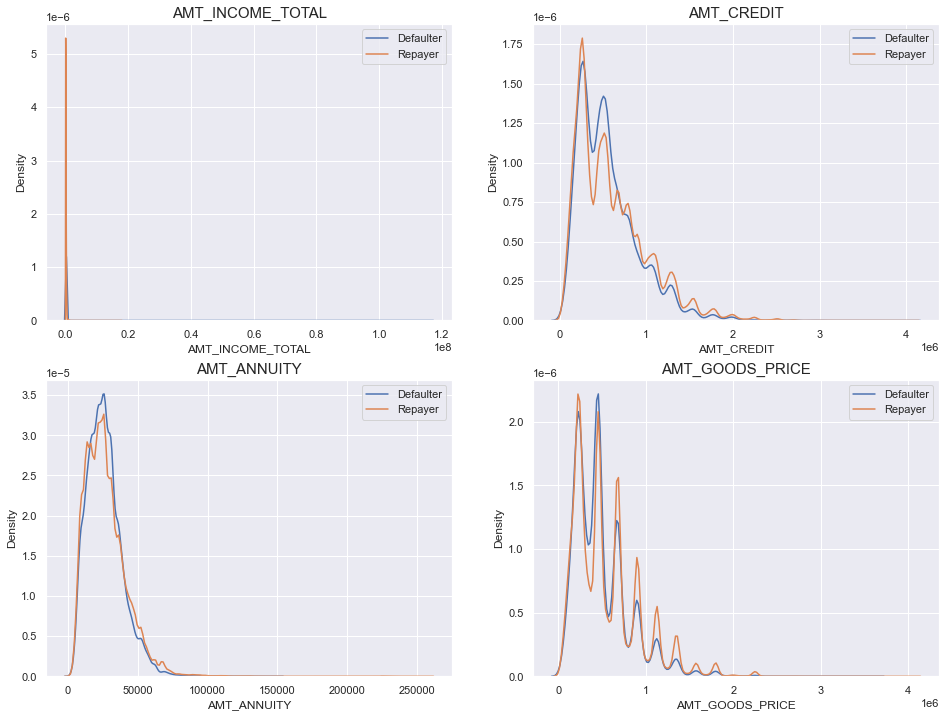

In [129]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(defaulters[i[1]], hist=False,label ="Defaulter")
    sns.distplot(nondefaulters[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

**Observation:**

- Most no of loans are given for goods price below 10 lakhs
- Most people pay annuity below 50K for the credit loan
- Credit amount of the loan is mostly less then 10 lakhs
- The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### 5. Standardising values

In [130]:
application_data.describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,CNT_CHILDREN,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,TARGET,HOUR_APPR_PROCESS_START,CNT_FAM_MEMBERS,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,SK_ID_CURR,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.072330e+05,307511.000000,307510.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307511.000000,307511.000000
mean,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,0.143421,1.422245,1.405292,0.100049,5.383962e+05,0.417052,962.858788,5.990260e+05,1.687979e+05,0.080729,12.063419,2.152665,2994.202373,4986.120328,67724.742149,43.435968,0.020868,27108.573909,278180.518577,185.547239
std,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,0.446698,2.400989,2.379803,0.362291,3.694465e+05,0.722121,826.808487,4.024908e+05,2.371231e+05,0.272419,3.265832,0.910682,1509.450419,3522.886321,139443.751806,11.954593,0.013831,14493.737315,102790.175348,382.037676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.050000e+04,0.000000,0.000000,4.500000e+04,2.565000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000290,1615.500000,100002.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.385000e+05,0.000000,274.000000,2.700000e+05,1.125000e+05,0.000000,10.000000,2.000000,1720.000000,2010.000000,933.000000,34.000000,0.010006,16524.000000,189145.500000,2.556164
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+05,0.000000,757.000000,5.135310e+05,1.471500e+05,0.000000,12.000000,2.000000,3254.000000,4504.000000,2219.000000,43.000000,0.018850,24903.000000,278202.000000,6.079452
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000,6.795000e+05,1.000000,1570.000000,8.086500e+05,2.025000e+05,0.000000,14.000000,3.000000,4299.000000,7479.500000,5707.000000,53.000000,0.028663,34596.000000,367142.500000,15.635616
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,34.000000,348.000000,344.000000,24.000000,4.050000e+06,19.000000,4292.000000,4.050000e+06,1.170000e+08,1.000000,23.000000,20.000000,7197.000000,24672.000000,365243.000000,69.000000,0.072508,258025.500000,456255.000000,1000.665753


**Observation:**

from above describe result we can see that

* columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.
* columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values
* convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED

#### 5.1 Taking care of columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [131]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [132]:
round((application_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [133]:
# Creating bins for Credit amount in term of Lakhs
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [134]:
round((application_data["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: AMT_CREDIT_RANGE, dtype: float64

In [135]:
# Creating bins for Price of Goods in term of Lakhs
application_data['AMT_GOODS_PRICE']=application_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_GOODS_PRICE_RANGE']=pd.cut(application_data['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [136]:
round((application_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

### 6. Identifying Outliers

Outlier detection for any data science process is essential. Sometimes removing outliers tend to improve our model meanwhile sometimes outliers may give you a very different approach to our analysis.

make a list of all the numeric columns and plot boxplots to understand the outliers in the data.

In [137]:
numerical_col = application_data.select_dtypes(include='number').columns
len(numerical_col)

26

In [138]:
numerical_col

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET', 'HOUR_APPR_PROCESS_START', 'CNT_FAM_MEMBERS', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'AMT_ANNUITY', 'SK_ID_CURR', 'YEARS_EMPLOYED'], dtype='object')

In [139]:
application_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'SK_ID_CURR'], dtype='object')

In [140]:
# # Plot Configuration 
# fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 
# fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

# #Using For loop 
# for ax, column in zip(axes.flatten(),numerical_col):        
#     #Ploting
#     sns.boxplot(application_data[column],ax=ax)   

In [141]:
application_data.shape

(307511, 50)

In [142]:
application_data.describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,CNT_CHILDREN,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,TARGET,HOUR_APPR_PROCESS_START,CNT_FAM_MEMBERS,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,SK_ID_CURR,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307233.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307511.000000,307511.000000
mean,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,0.143421,1.422245,1.405292,0.100049,5.383962,0.417052,962.858788,5.990260,1.687979,0.080729,12.063419,2.152665,2994.202373,4986.120328,67724.742149,43.435968,0.020868,27108.573909,278180.518577,185.547239
std,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,0.446698,2.400989,2.379803,0.362291,3.694465,0.722121,826.808487,4.024908,2.371231,0.272419,3.265832,0.910682,1509.450419,3522.886321,139443.751806,11.954593,0.013831,14493.737315,102790.175348,382.037676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405000,0.000000,0.000000,0.450000,0.256500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000290,1615.500000,100002.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.385000,0.000000,274.000000,2.700000,1.125000,0.000000,10.000000,2.000000,1720.000000,2010.000000,933.000000,34.000000,0.010006,16524.000000,189145.500000,2.556164
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000,757.000000,5.135310,1.471500,0.000000,12.000000,2.000000,3254.000000,4504.000000,2219.000000,43.000000,0.018850,24903.000000,278202.000000,6.079452
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000,6.795000,1.000000,1570.000000,8.086500,2.025000,0.000000,14.000000,3.000000,4299.000000,7479.500000,5707.000000,53.000000,0.028663,34596.000000,367142.500000,15.635616
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,34.000000,348.000000,344.000000,24.000000,40.500000,19.000000,4292.000000,40.500000,1170.000000,1.000000,23.000000,20.000000,7197.000000,24672.000000,365243.000000,69.000000,0.072508,258025.500000,456255.000000,1000.665753


**Observation:**

* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:**

In [143]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

In [144]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var], palette="Set3")
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var], color="r")
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

#### 6.1 Removing Outliers

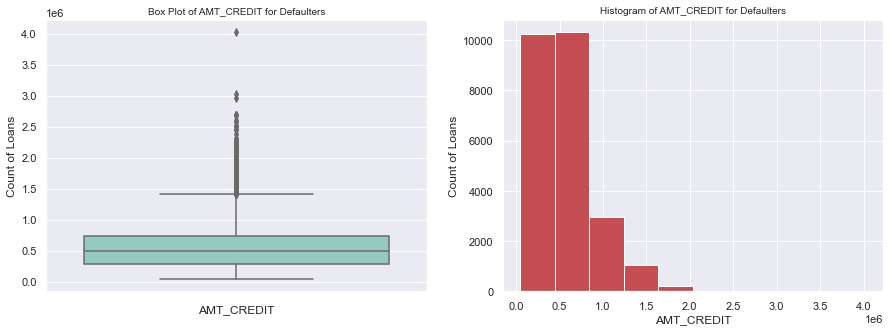

In [145]:
plot_boxhist('AMT_CREDIT')

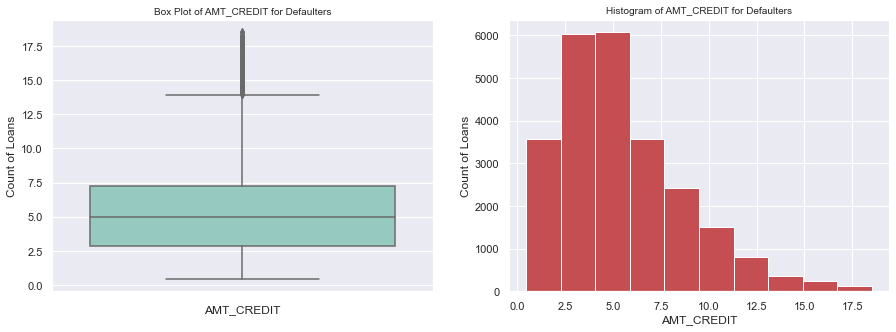

In [146]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_CREDIT<np.nanpercentile(application_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_CREDIT')

**Observation:**

we observe that the credit amount lies between 2.5 to around 5.0 for defaulters.

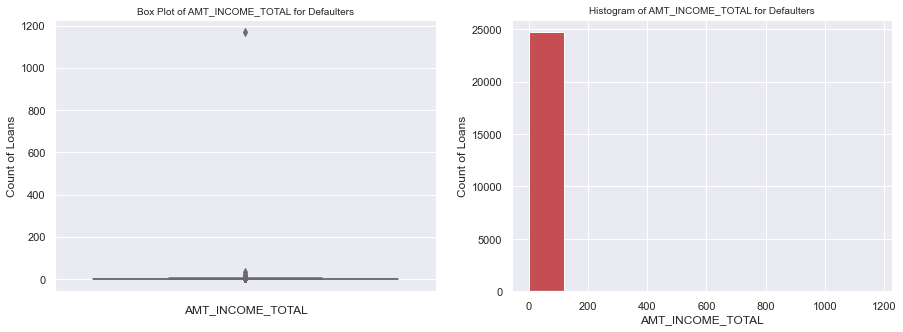

In [147]:
plot_boxhist('AMT_INCOME_TOTAL')

**Observation:**

We can see that there are some outliers and the graph looks like this to accomodate those outliers.
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

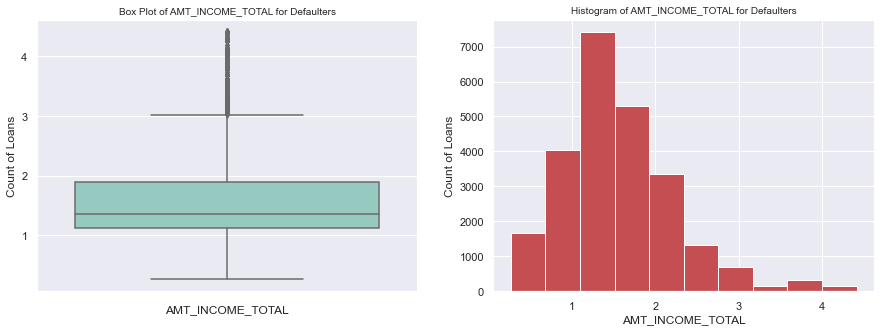

In [148]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

**Observation:**

This tell us that most people with payment have incomes in the lower range between 1 to 2 which some on the higher end some on the lower

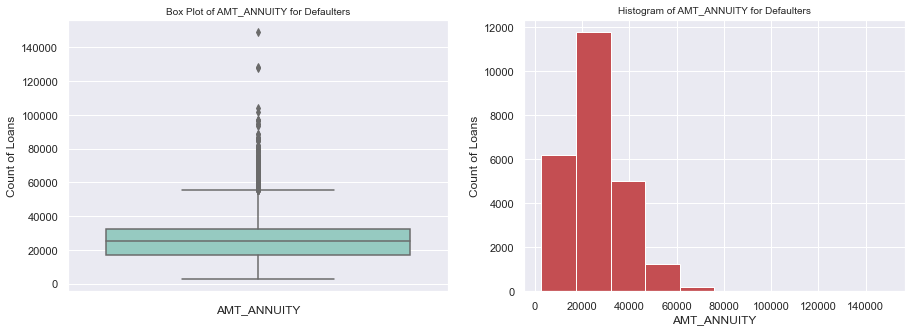

In [149]:
plot_boxhist('AMT_ANNUITY')

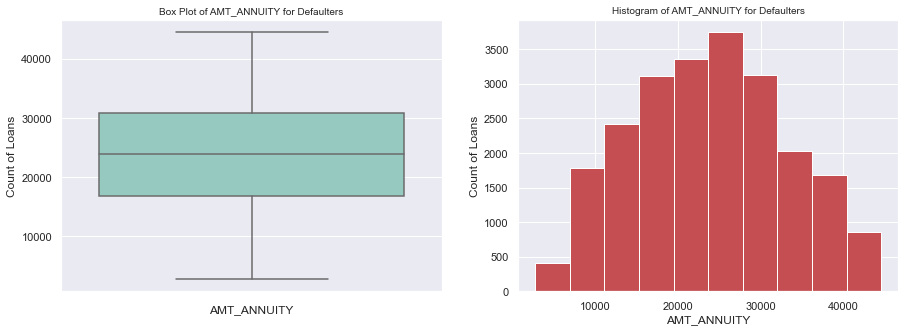

In [150]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_ANNUITY')

Text(0.5, 1.0, 'Histogram of age in years.')

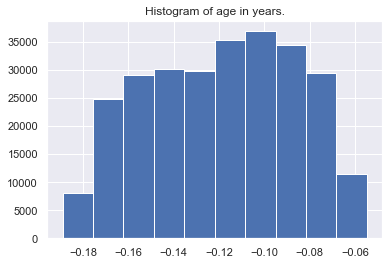

In [151]:
#Deriving new metric Age from Days Birth
application_data['AGE'] = application_data['DAYS_BIRTH'] / -365
plt.hist(application_data['AGE'])
plt.title('Histogram of age in years.')

**Observation**

We can see that Age seems to be fairly distributed

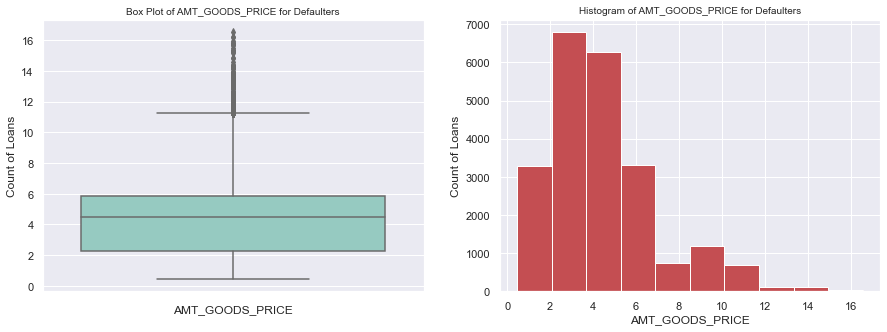

In [152]:
plot_boxhist('AMT_GOODS_PRICE')

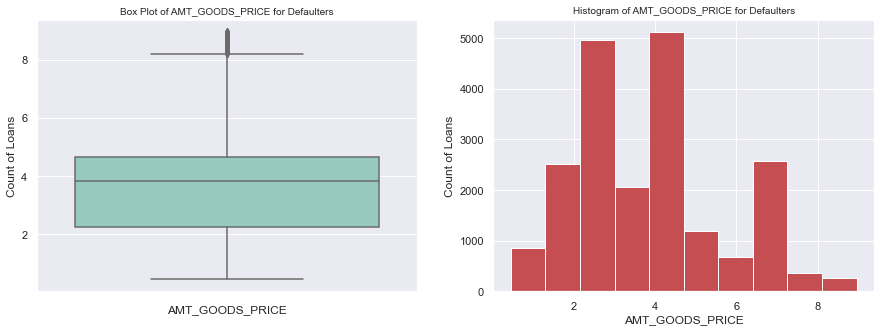

In [153]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_GOODS_PRICE<np.nanpercentile(application_data['AMT_GOODS_PRICE'], 90)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_GOODS_PRICE')

In [154]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

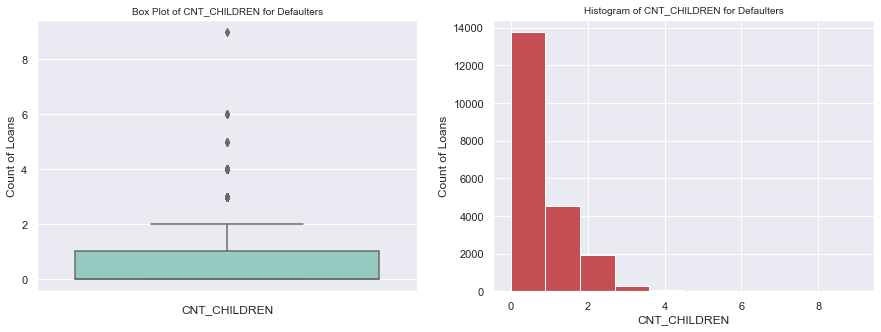

In [155]:
plot_boxhist('CNT_CHILDREN')

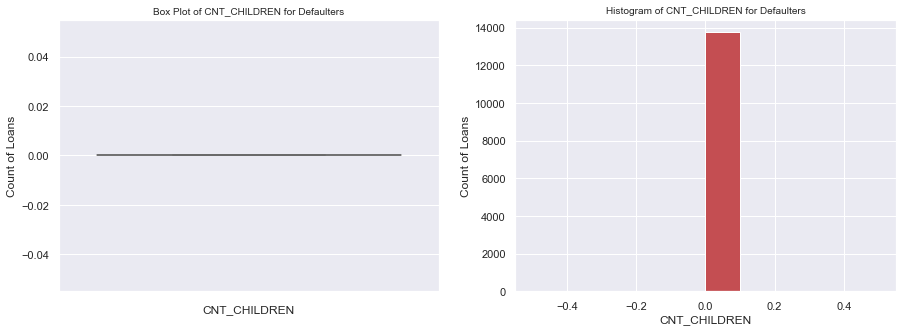

In [156]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.CNT_CHILDREN<np.nanpercentile(application_data['CNT_CHILDREN'], 90)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('CNT_CHILDREN')

In [157]:
#Deriving variable "Years Employed" from days employed
application_data['YEARS_EMPLOYED'] = (application_data['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

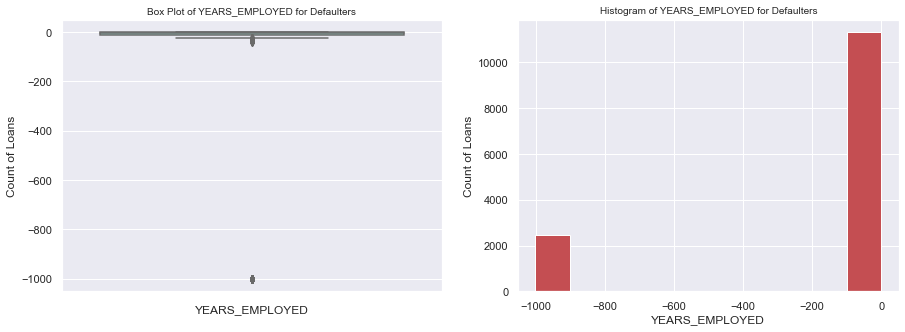

In [158]:
plot_boxhist('YEARS_EMPLOYED')

**Observation**

A large number of entries have 0 which means, a lot of people don't work.

In [159]:
application_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL                      
                                                               mean median  count     max
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                           
Academic degree               Commercial associate         2.106562  2.025     16  3.6000
                              Pensioner                    1.567125  1.125     16  3.1500
                              State servant                2.307857  2.070      7  4.0500
                              Working                      1.865571  1.665     35  3.8250
Higher education              Businessman                  2.025000  2.025      2  2.2500
                              Commercial associate         1.900810  1.800   9576  4.4550
                              Pensioner                    1.441564  1.350   5832  4.2750
                              State servant                1.776181  1.575   3365  4.4550
                              Student                      1.620000  1.710      3  1.8000
                              Unemployed                   2.418750  2.475      4  3.3750
                              Working                      1.681095  1.575  14512  4.4550
Incomplete higher             Commercial associate         1.738145  1.575   1693  4.4235
                              Pensioner                    1.345059  1.260    397  3.6000
                              State servant                1.600772  1.395    344  4.2750
                              Student                      1.575000  1.575      1  1.5750
                              Unemployed                   1.575000  1.575      2  2.7000
                              Working                      1.549254  1.350   2972  4.4100
Lower secondary               Commercial associate         1.493405  1.350    242  3.6000
                              Pensioner                    1.012340  0.900   1365  3.6000
                              State servant                1.336579  1.170     57  4.2750
                              Working                      1.299913  1.170    939  3.9150
Secondary / secondary special Commercial associate         1.616394  1.575  21519  4.4550
                              Pensioner                    1.206405  1.125  37427  4.4100
                              State servant                1.457760  1.350   5761  4.3650
                              Student                      1.312500  1.350      6  1.8000
                              Unemployed                   0.648643  0.450      7  1.3500
                              Working                      1.417551  1.350  60614  4.4550

**Observation**

We can see that most of the loans are taken by working people with secondary education.

### 7 Bi-Variate Analysis of Variables

#### 7.1 Converting Desired columns from Object to categorical column

In [160]:
application_data.columns

Index(['OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'AMT_ANNUITY', 'SK_ID_CURR', 'AMT_INCOME_TYPE',
   

In [161]:
# create a list for all categorical columns.
categorical_col = list(application_data.select_dtypes(include= 'category').columns)
object_col = list(application_data.select_dtypes(include= 'object').columns) 

In [162]:
categorical_col

['AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE',
 'AGE_GROUP',
 'EMPLOYEMENT_YEARS',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'AMT_GOODS_PRICE_RANGE']

In [163]:
object_col

['OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [164]:
null_values(application_data)["Data_Type"].value_counts()

float64     20
object      17
int64        6
category     3
category     2
int32        1
category     1
category     1
Name: Data_Type, dtype: int64

In [165]:
null_values(application_data)["Data_Type"]

DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
NAME_TYPE_SUITE                  object
OCCUPATION_TYPE                  object
NAME_INCOME_TYPE                 object
ORGANIZATION_TYPE                object
DAYS_ID_PUBLISH                   int64
DAYS_REGISTRATION               float64
DAYS_EMPLOYED                     int64
DAYS_BIRTH                        int32
REGION_POPULATION_RELATIVE      float64
NAME_HOUSING_TYPE                object
NAME_FAMILY_STATUS               object
NAME_EDUCATION_TYPE              object
AMT_INCOME_TYPE                category
AMT_ANNUITY                     float64
SK_ID_CURR                        int64
WEEKDAY_APPR_PROCESS_START       object
AMT_CREDIT_TYPE                category
AGE_GROUP                      category
YEARS_EMPLOYED                  float64
EMPLOYEMENT_YEARS              category
AMT_INCOME_RANGE               category


In [166]:
categorical_columns = categorical_col + object_col
len(categorical_columns)

24

In [167]:
len(categorical_col)

7

In [168]:
len(object_col)

17

In [169]:
for col in categorical_columns:
    application_data[col] = pd.Categorical(application_data[col])

In [170]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166714 entries, 0 to 307509
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   OCCUPATION_TYPE              166714 non-null  category
 1   AMT_REQ_CREDIT_BUREAU_HOUR   166714 non-null  float64 
 2   AMT_REQ_CREDIT_BUREAU_DAY    166714 non-null  float64 
 3   AMT_REQ_CREDIT_BUREAU_WEEK   166714 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_MON    166714 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_QRT    166714 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_YEAR   166714 non-null  float64 
 7   NAME_TYPE_SUITE              166188 non-null  category
 8   DEF_30_CNT_SOCIAL_CIRCLE     166122 non-null  float64 
 9   OBS_30_CNT_SOCIAL_CIRCLE     166122 non-null  float64 
 10  OBS_60_CNT_SOCIAL_CIRCLE     166122 non-null  float64 
 11  DEF_60_CNT_SOCIAL_CIRCLE     166122 non-null  float64 
 12  AMT_GOODS_PRICE              166714 non-null

In [171]:
null_values(application_data)["Data_Type"]

DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
NAME_TYPE_SUITE                category
OCCUPATION_TYPE                category
NAME_INCOME_TYPE               category
ORGANIZATION_TYPE              category
DAYS_ID_PUBLISH                   int64
DAYS_REGISTRATION               float64
DAYS_EMPLOYED                     int64
DAYS_BIRTH                        int32
REGION_POPULATION_RELATIVE      float64
NAME_HOUSING_TYPE              category
NAME_FAMILY_STATUS             category
NAME_EDUCATION_TYPE            category
AMT_INCOME_TYPE                category
AMT_ANNUITY                     float64
SK_ID_CURR                        int64
WEEKDAY_APPR_PROCESS_START     category
AMT_CREDIT_TYPE                category
AGE_GROUP                      category
YEARS_EMPLOYED                  float64
EMPLOYEMENT_YEARS              category
AMT_INCOME_RANGE               category


#### 7.2 Numerical & Categorical W.R.T Target variables

In [172]:
# checking required column for analysis
application_data[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]].tail()

,TARGET,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS
307505,0,1.125,Secondary / secondary special,Single / not married
307506,0,1.575,Secondary / secondary special,Separated
307507,0,0.720,Secondary / secondary special,Widow
307508,0,1.530,Higher education,Separated
307509,1,1.710,Secondary / secondary special,Married


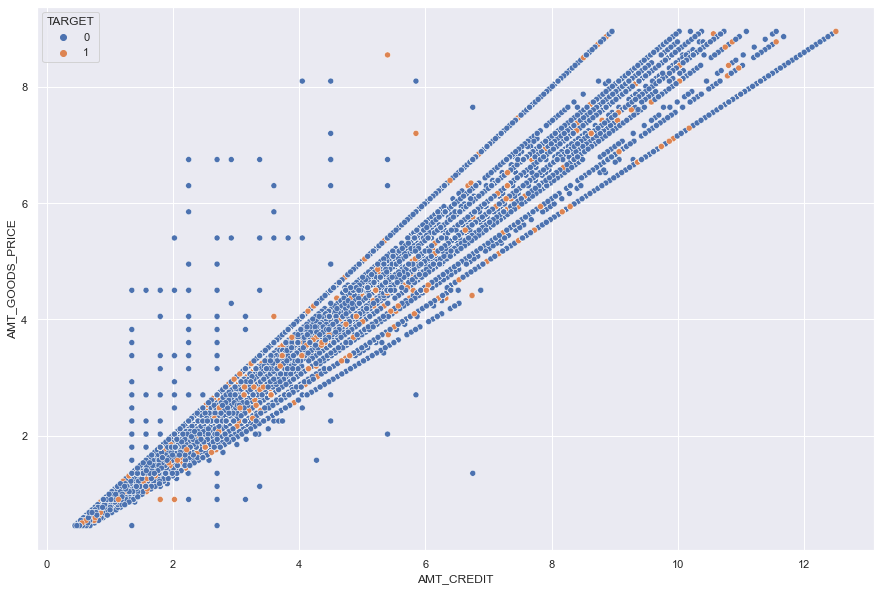

In [173]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=application_data,hue="TARGET")
plt.show()

#### 7.2.1 AMT_INCOME_TOTAL Vs NAME_EDUCATION_TYPE Vs NAME_FAMILY_STATUS for no payment and payment difficulties client (Target 0 and Target 1)

In [174]:
def boxplot_income_total(var):
    #As the values are too large, it is convinient to use log for better analysis
    plt.figure(figsize=(25,8)) 
    plt.yscale('log')                     
    plt.xticks(rotation = 90)

    #Boxplot
    sns.set_theme(style="darkgrid")
    sns.color_palette("Spectral", as_cmap=True)
    sns.boxplot(data =var, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
                hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

    #Adjusting legend position
    plt.legend( loc = 'upper right')                                              
    plt.title('Income amount vs Education Status',fontsize=18 )
    plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 15, fontweight="bold")
    plt.ylabel("AMT_INCOME_TOTAL",fontsize= 15, fontweight="bold")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(rotation=360, fontsize=15)

plt.show()


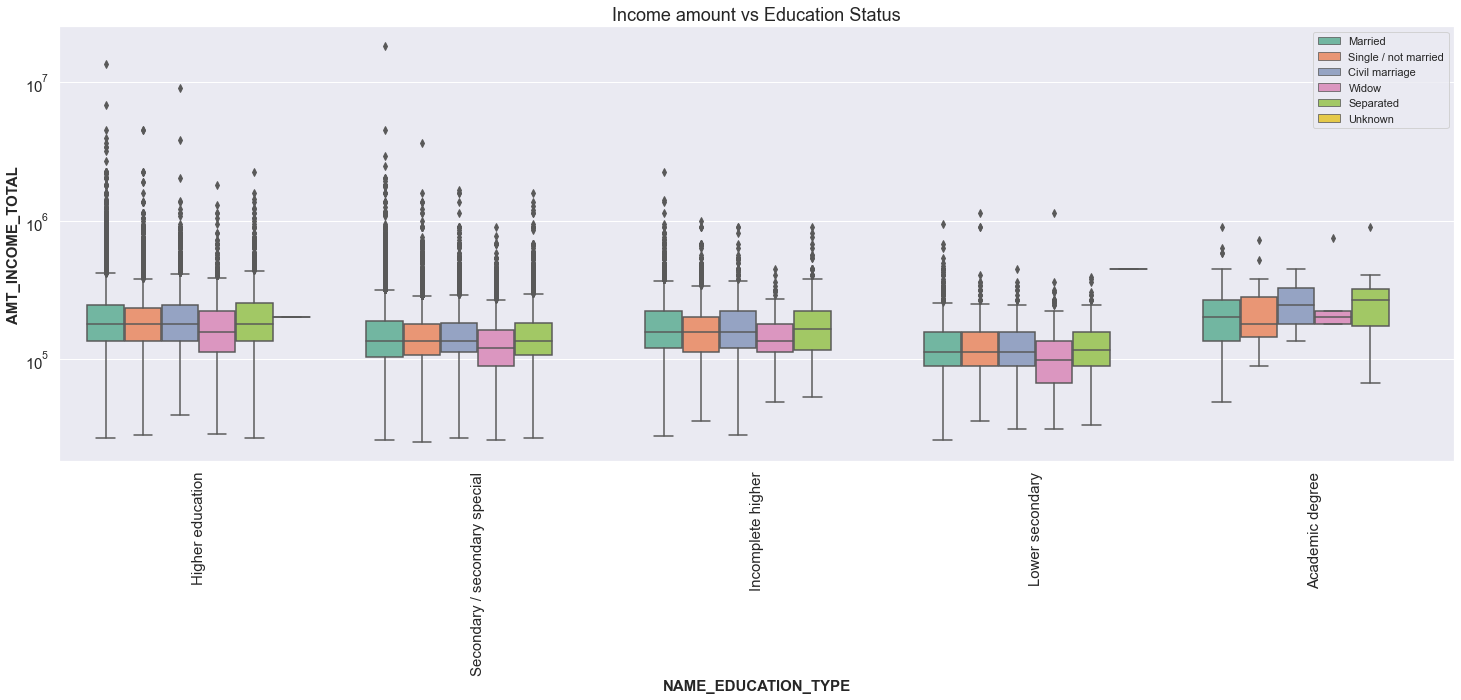

In [175]:
# boxplot for target0
boxplot_income_total(Target0)

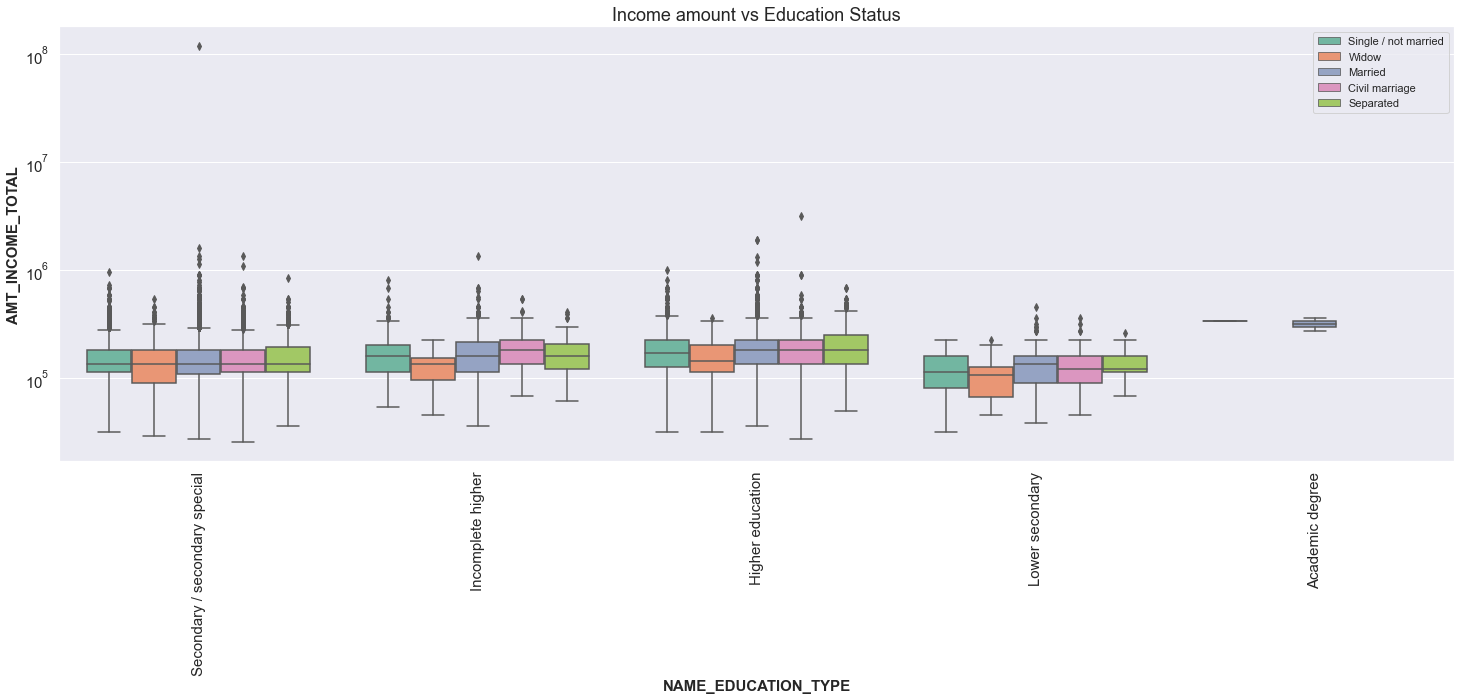

In [176]:
# boxplot for target1
boxplot_income_total(Target1)

**Observation:**

 ***for TARGET 0***
* Widow Client with Academic degree have very few outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.
* Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%
* Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.
* From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.
* Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.
* Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

 ***for TARGET 1***
* The income amount for Married clients with an academic degree is much lesser as compared to others.
* (Defaulter) Clients have relatively less income as compared to Non-defaulters.

##### 7.2.2 NAME_EDUCATION_TYPE Vs AMT_CREDIT Vs NAME_FAMILY_STATUS for no payment and payment difficulties client (Target 0 and Target 1)

In [177]:
def boxplot_amt_credit(var):
    #As the values are too large, it is convinient to use log for better analysis
    plt.figure(figsize=(15,8)) 
    plt.yscale('log')                     
    plt.xticks(rotation = 90)

    #Boxplot w.r.t Data Target 0
    sns.set_theme(style="darkgrid")
    sns.color_palette("Spectral", as_cmap=True)
    sns.boxplot(data =var, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           
                hue ='NAME_FAMILY_STATUS',orient='v',palette='Set3')


    #Adjusting legend position
    plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            
    plt.title('Credit V/s Education',fontsize=15 )
    plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 12, fontweight="bold")
    plt.ylabel("AMT_CREDIT",fontsize= 12, fontweight="bold")
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=360, fontsize=12)

    plt.show()

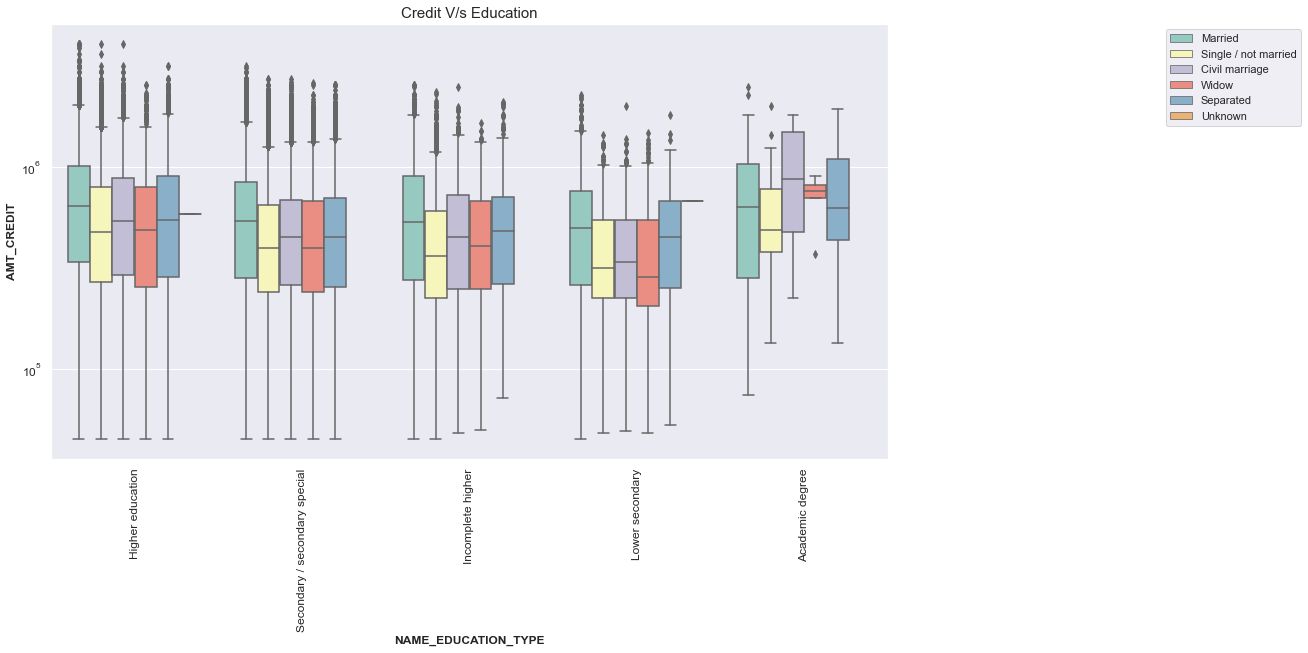

In [178]:
boxplot_amt_credit(Target0)

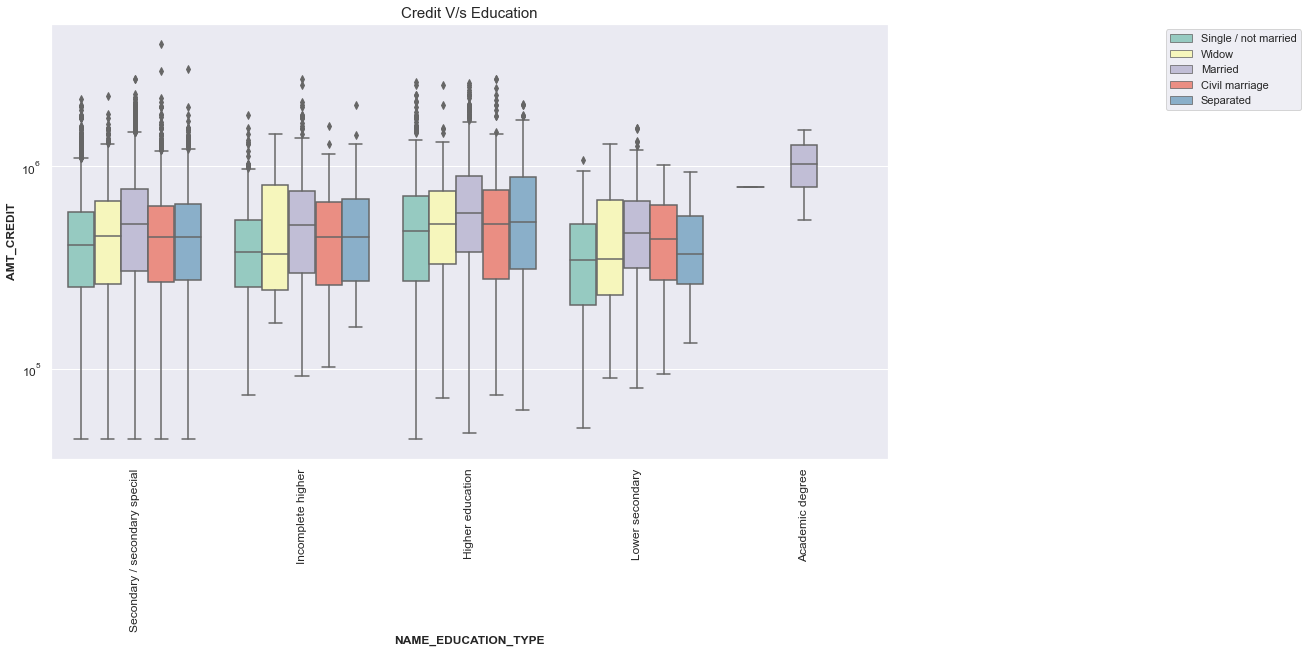

In [179]:
boxplot_amt_credit(Target1)

**Observation**

***for TARGET 0***

* Clients with different Education types except Academic degrees have a large number of outliers**
* Most of the population i.e. clients’ credit amounts lie below 25%.
* Clients with an Academic degree and who is a widow tend to take higher credit loan.**
* Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

***for TARGET 1***
* Married client with academic applied for a higher credit loan. And doesn’t have outliers. Single clients with academic degrees have a very slim boxplot with no outliers.
* Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

</hr>
</hr>

### 8 **Correlation between numeric variable**

#### 8.1 correlation with nondefaulters or Repayers

In [180]:
# Getting  top 10 correlation for the Repayers or nondefaulters dataframe

corr_repayer = nondefaulters.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(20)

,VAR1,VAR2,Correlation
695,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
723,AGE,DAYS_BIRTH,1.000000
223,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998652
361,AMT_CREDIT,AMT_GOODS_PRICE,0.974172
249,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.864080
631,AMT_ANNUITY,AMT_GOODS_PRICE,0.728451
634,AMT_ANNUITY,AMT_CREDIT,0.726149
722,AGE,DAYS_EMPLOYED,0.644937
727,AGE,YEARS_EMPLOYED,0.644937
696,YEARS_EMPLOYED,DAYS_BIRTH,0.644937


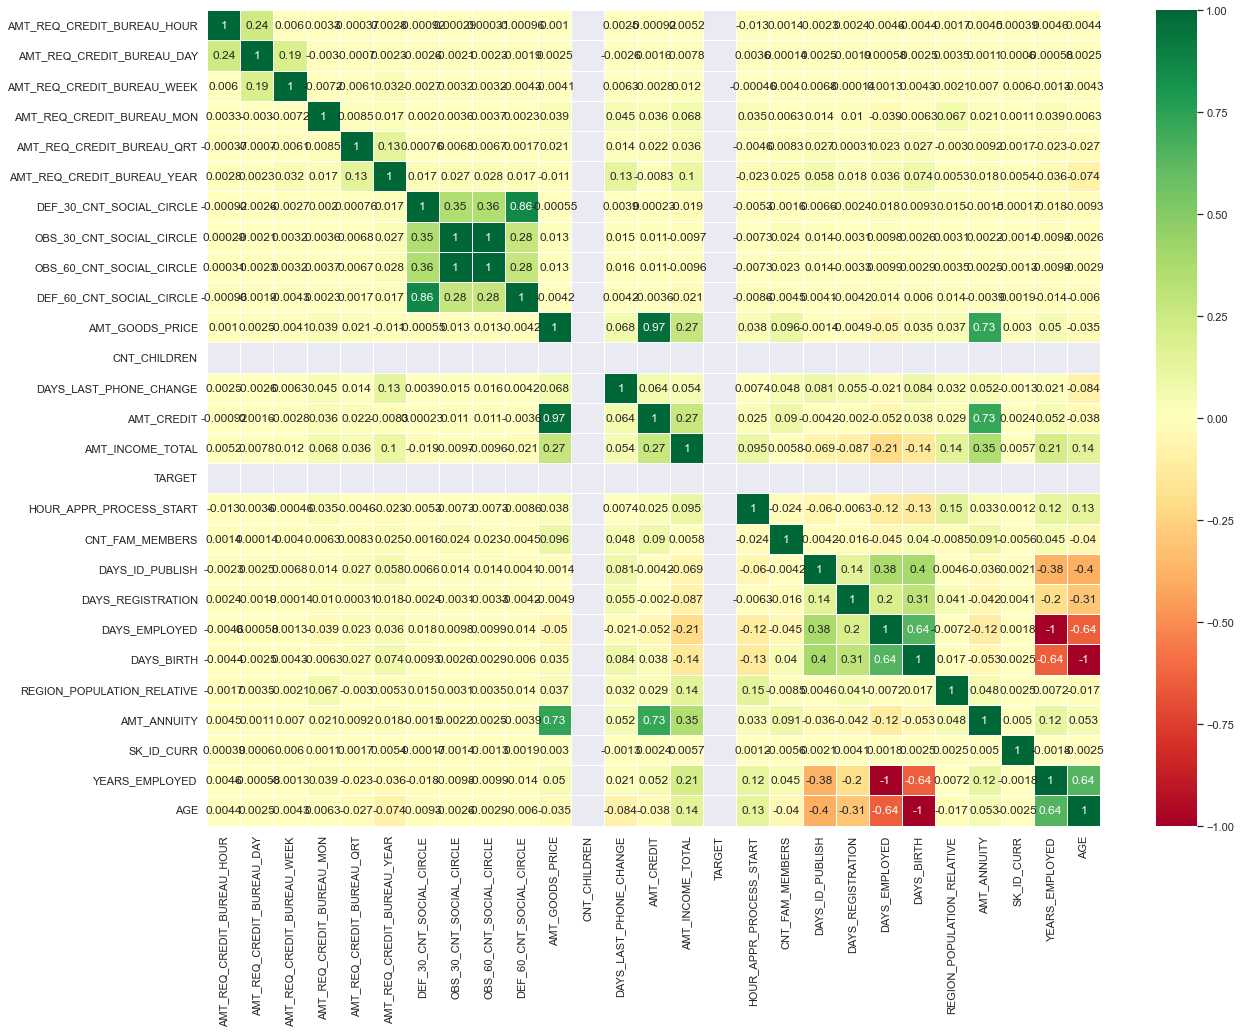

In [181]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(nondefaulters.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Observation**
**Correlating factors amongst repayers**

**1. AMT_ANNUITY (Loan Annuity) amount is highly correlated with:**
* **Goods Price Amount**
* **Amount Credit**
* **Total Income upto some extent**

**2. We can also see that repayers have high correlation in number of days employed.**

#### 8.2 correlation with defaulters

In [182]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = defaulters.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
723,AGE,DAYS_BIRTH,1.000000
695,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
223,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998400
361,AMT_CREDIT,AMT_GOODS_PRICE,0.967577
249,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.878254
634,AMT_ANNUITY,AMT_CREDIT,0.714824
631,AMT_ANNUITY,AMT_GOODS_PRICE,0.712505
722,AGE,DAYS_EMPLOYED,0.617435
587,DAYS_BIRTH,DAYS_EMPLOYED,0.617435
696,YEARS_EMPLOYED,DAYS_BIRTH,0.617435


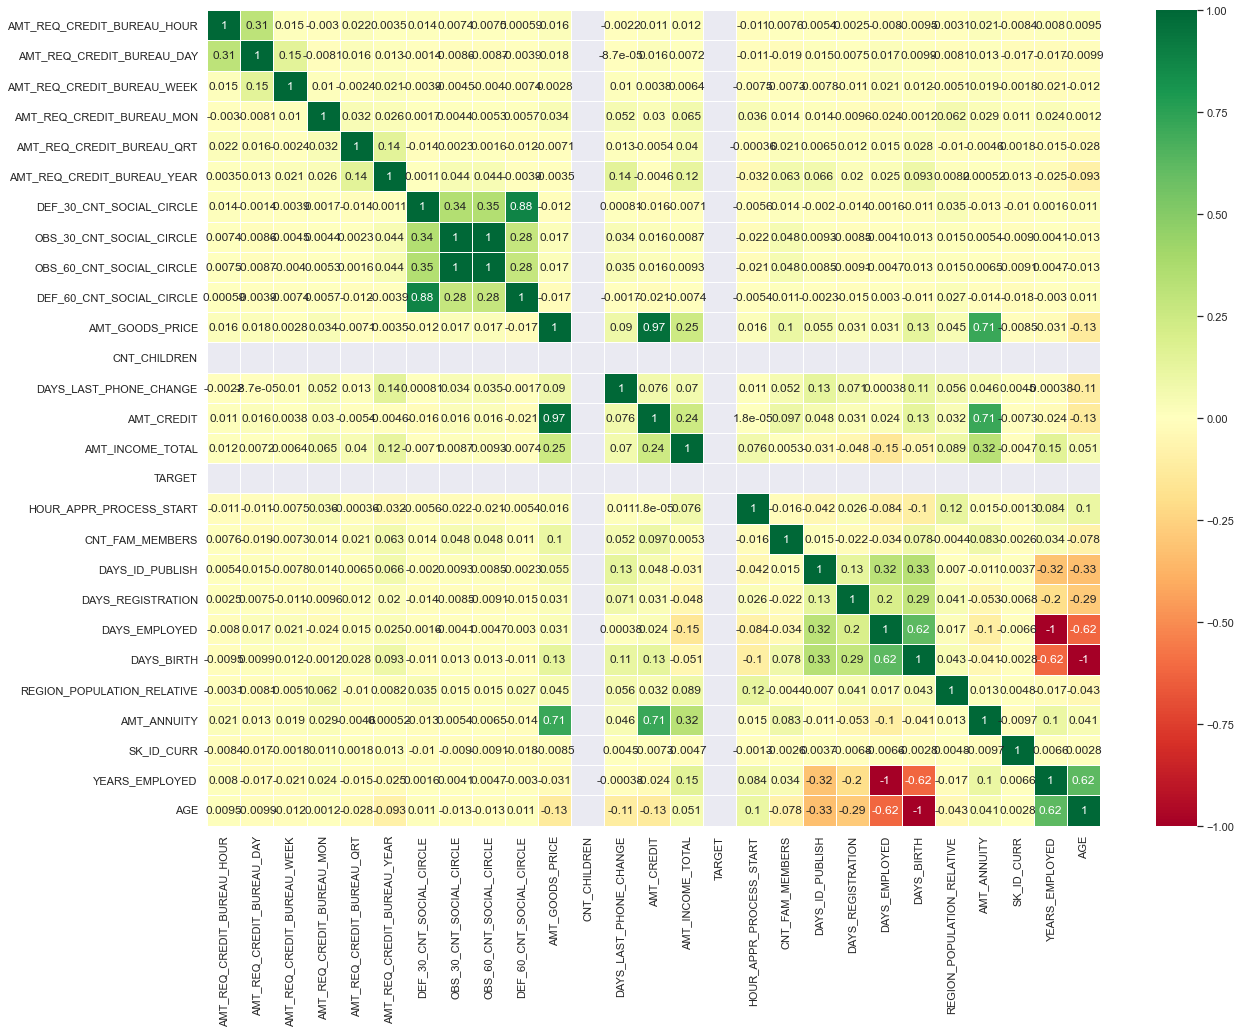

In [183]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(defaulters.corr(), cmap="RdYlGn",annot=True,linewidth =1)

Observation: Correlating factors amongst repayers

- Credit amount is highly correlated with good price amount which is same as repayers.
- Loan annuity correlation with credit amount has slightly reduced in defaulters(0.71) when compared to repayers(0.72)
- We can also see that repayers have high correlation in number of days employed(0.64) when compared to defaulters(0.61).
- Days_birth and number of children correlation has reduced to 0.25 in defaulters when compared to 0.33 in repayers.
- There is a slight increase in defaulted to observed count in social circle among defaulters(0.26) when compared to repayers(0.25)

In [184]:
null_values(application_data)


,Total,Data_Type,Unique,Percent
DEF_30_CNT_SOCIAL_CIRCLE,592,float64,9,0.36
OBS_30_CNT_SOCIAL_CIRCLE,592,float64,31,0.36
OBS_60_CNT_SOCIAL_CIRCLE,592,float64,31,0.36
DEF_60_CNT_SOCIAL_CIRCLE,592,float64,9,0.36
NAME_TYPE_SUITE,526,category,7,0.32
OCCUPATION_TYPE,0,category,19,0.00
NAME_INCOME_TYPE,0,category,7,0.00
ORGANIZATION_TYPE,0,category,58,0.00
DAYS_ID_PUBLISH,0,int64,5997,0.00
DAYS_REGISTRATION,0,float64,15414,0.00


**Observation**

- After analysing of all the columns of data we are left with few columns which have less than 0.36% of data with missing values..
- These data which are in float64 datatypes are "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE" and other which is in category datatype NAME_TYPE_SUITE.
- we can replace all these left over missing values with mode as they are very ledd in % instead of removing the rows.

In [185]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      136627
Family              21109
Spouse, partner      5114
Children             1709
Other_B               991
Other_A               486
Group of people       152
Name: NAME_TYPE_SUITE, dtype: int64

In [186]:
application_data["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

592

In [187]:
#  left columns to deal with missing values
left_cols = ["DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "NAME_TYPE_SUITE"]

In [188]:
#  filling null values with mode
l=application_data.filter(left_cols).mode()
application_data[left_cols]=application_data[left_cols].fillna(value=l.iloc[0])

In [189]:
application_data["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [190]:
null_values(application_data)

,Total,Data_Type,Unique,Percent
OCCUPATION_TYPE,0,category,19,0.0
NAME_EDUCATION_TYPE,0,category,5,0.0
WEEKDAY_APPR_PROCESS_START,0,category,7,0.0
CNT_FAM_MEMBERS,0,float64,2,0.0
ORGANIZATION_TYPE,0,category,58,0.0
DAYS_ID_PUBLISH,0,int64,5997,0.0
DAYS_REGISTRATION,0,float64,15414,0.0
DAYS_EMPLOYED,0,int64,11434,0.0
DAYS_BIRTH,0,int32,50,0.0
REGION_POPULATION_RELATIVE,0,float64,81,0.0


In [191]:
application_data.shape

(166714, 51)

In [192]:
application_data.head()

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE
0,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,3.510,0,Cash loans,M,1134.0,Y,4.065975,2.025,N,N,1,N,N,N,N,10,WEDNESDAY,1.0,Business Entity Type 3,2120,3648.0,637,25,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,MEDIUM,LOW,Very_Young,-1.745205,0-5,2L-3L,4L-5L,3L-4L,-0.068493
2,Laborers,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,1.350,0,Revolving loans,M,815.0,Y,1.350000,0.675,N,N,0,N,N,N,N,9,MONDAY,1.0,Government,2531,4260.0,225,52,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,VERY_LOW,VERY_LOW,Middle_Age,-0.616438,0-5,0-1L,1L-2L,1L-2L,-0.142466
3,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.970,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,LOW,LOW,Middle_Age,-8.326027,5-10,1L-2L,3L-4L,2L-3L,-0.142466
4,Core staff,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,5.130,0,Cash loans,M,1106.0,Y,5.130000,1.215,Y,Y,0,N,N,N,N,11,THURSDAY,1.0,Religion,3458,4311.0,3038,54,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007,LOW,LOW,Middle_Age,-8.323288,5-10,1L-2L,5L-6L,5L-6L,-0.147945
5,Laborers,0.0,0.0,0.0,0.0,1.0,1.0,"Spouse, partner",0.0,0.0,0.0,0.0,4.545,0,Cash loans,M,2536.0,Y,4.904955,0.990,N,N,0,N,N,N,N,16,WEDNESDAY,2.0,Other,477,4970.0,1588,46,0.035792,House / apartment,Married,Secondary / secondary special,State servant,27517.5,100008,VERY_LOW,LOW,Middle_Age,-4.350685,0-5,0-1L,4L-5L,4L-5L,-0.126027


In [193]:
# saving application data to analyses to merge data with previous data in further analysis with previous data..
application_data.to_csv("application_data_clean.csv", index=False)

In [194]:
# checkin purpose to see data
app = pd.read_csv("application_data_clean.csv")
app.head()

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE
0,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,3.510,0,Cash loans,M,1134.0,Y,4.065975,2.025,N,N,1,N,N,N,N,10,WEDNESDAY,1.0,Business Entity Type 3,2120,3648.0,637,25,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,MEDIUM,LOW,Very_Young,-1.745205,0-5,2L-3L,4L-5L,3L-4L,-0.068493
1,Laborers,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,1.350,0,Revolving loans,M,815.0,Y,1.350000,0.675,N,N,0,N,N,N,N,9,MONDAY,1.0,Government,2531,4260.0,225,52,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,VERY_LOW,VERY_LOW,Middle_Age,-0.616438,0-5,0-1L,1L-2L,1L-2L,-0.142466
2,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.970,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,LOW,LOW,Middle_Age,-8.326027,5-10,1L-2L,3L-4L,2L-3L,-0.142466
3,Core staff,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,5.130,0,Cash loans,M,1106.0,Y,5.130000,1.215,Y,Y,0,N,N,N,N,11,THURSDAY,1.0,Religion,3458,4311.0,3038,54,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007,LOW,LOW,Middle_Age,-8.323288,5-10,1L-2L,5L-6L,5L-6L,-0.147945
4,Laborers,0.0,0.0,0.0,0.0,1.0,1.0,"Spouse, partner",0.0,0.0,0.0,0.0,4.545,0,Cash loans,M,2536.0,Y,4.904955,0.990,N,N,0,N,N,N,N,16,WEDNESDAY,2.0,Other,477,4970.0,1588,46,0.035792,House / apartment,Married,Secondary / secondary special,State servant,27517.5,100008,VERY_LOW,LOW,Middle_Age,-4.350685,0-5,0-1L,4L-5L,4L-5L,-0.126027


#### **Conclusion**
- Now that I have gained insight into the dataset ie performed an Exploratory Data Analysis, So summarizing what I have learnt and did in this case study,

- I have extensively covered pre-processing steps required to analyze data
- I have covered Null value imputation methods
- I have also covered step by step analyzing techniques such as Univariate analysis, Bivariate analysis, Multivariate analysis, etc
- Now we are left with 0 missing values and clead the data based on the scenario what I have explained and did analysis in the above.
- Now We are ready for model training for further analysis to train.